In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# AI Agents for Engineers (Evolution of AI Agents)

<a target="_blank" href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/workshops/ai-agents/ai_agents_for_engineers.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

| | |
|-|-|
| Author(s) | [Kristopher Overholt](https://github.com/koverholt) [Holt Skinner](https://github.com/holtskinner)|

## Overview

This notebook demonstrates 3 different approaches to generating essays using the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) or [Gemini API in Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). Each method illustrates a distinct paradigm for running AI Agents in differing levels of complexity.

1. Zero-Shot Approach with the Gemini API
2. Step-by-Step Approach With LangChain
3. Iterative, AI-Agent Approach with LangGraph

## Get started

### Install Gemini SDK and other required packages


In [1]:
%pip install --upgrade --quiet \
    google-genai \
    langgraph \
    langchain \
    langchain-google-genai \
    langchain-google-vertexai \
    langchain-community \
    tavily-python \
    pydantic

### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [2]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Wait until it's finished before continuing to the next step. ⚠️</b>
</div>


### Configure Tavily

Get an API key for [Tavily](https://tavily.com/), a web search API for Generative AI models.

In [4]:
import os

os.environ["TAVILY_API_KEY"] = "Key Here"

In [6]:
# If your API Keys are in Colab Secrets
import sys

if "google.colab" in sys.modules:
    from google.colab import userdata

    os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")

### Configure Gemini Developer API

Get API keys from [Google AI Studio](https://ai.google.dev/gemini-api/docs/api-key) and [Tavily](https://tavily.com/).

In [5]:
import os

os.environ["GOOGLE_API_KEY"] = "Key Here"

In [7]:
# If your API Keys are in Colab Secrets
import sys

if "google.colab" in sys.modules:
    from google.colab import userdata

    os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")

### Configure Vertex AI

**Use a Google Cloud Project:** This requires enabling the Vertex AI API in your Google Cloud project.

[Enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com)

In [29]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

In [30]:
PROJECT_ID = "376507459805"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

os.environ["GOOGLE_GENAI_USE_VERTEXAI"] = "true"

## Generating Essays Using a Zero-Shot Approach with the Gemini API

With just a single call to the `generate_content` method, users can create detailed, structured essays on any topic by leveraging state-of-the-art language models such as Gemini 1.5 Pro or Gemini 1.5 Flash.

<img src="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/workshops/ai-agents/1-prompt-essay.png?raw=1" width="350px">

### Import libraries

In [8]:
from IPython.display import Markdown, display

### Create Client

In [9]:
from google import genai

client = genai.Client()

Verify which API you are using.

In [31]:
if not client.vertexai:
    print(f"Using Gemini Developer API.")
elif client._api_client.project:
    print(
        f"Using Vertex AI with project: {client._api_client.project} in location: {client._api_client.location}"
    )
elif client._api_client.api_key:
    print(
        f"Using Vertex AI in express mode with API key: {client._api_client.api_key[:5]}...{client._api_client.api_key[-5:]}"
    )

Using Gemini Developer API.


### Load model

In [11]:
MODEL_ID = "gemini-2.0-flash-001"

### Make an API call to generate the essay

In [14]:
prompt = "Write a 3-paragraph essay about auto regressive LLMs"

response = client.models.generate_content(model=MODEL_ID, contents=prompt)
display(Markdown(response.text))

Auto-regressive large language models (LLMs) represent a significant advancement in artificial intelligence, primarily due to their ability to predict and generate sequences of text in a manner that closely mimics human writing. At their core, these models function by learning the probability distribution of words or sub-word units (tokens) based on the context of preceding tokens in a given sequence. This means that, given a prompt or an initial set of words, the model predicts the next most likely token, appends it to the sequence, and then iteratively repeats this process to generate coherent and contextually relevant text. This sequential approach allows auto-regressive LLMs to produce diverse outputs, including articles, stories, code, and even translations, making them versatile tools for a wide range of applications.

The power of auto-regressive LLMs lies in their ability to learn complex relationships and patterns from massive datasets of text and code. Through exposure to billions of words, these models develop a deep understanding of grammar, syntax, semantics, and even stylistic nuances. This extensive training allows them to generate text that is not only grammatically correct but also exhibits a remarkable degree of coherence and understanding. Furthermore, techniques like attention mechanisms enable the model to focus on the most relevant parts of the input sequence, improving its ability to capture long-range dependencies and maintain context throughout longer generations.

However, despite their impressive capabilities, auto-regressive LLMs are not without their limitations. They can sometimes exhibit biases present in their training data, leading to outputs that are discriminatory or reinforce harmful stereotypes. Additionally, they can sometimes generate factually incorrect or nonsensical information, particularly when dealing with topics outside their core knowledge base. Addressing these challenges requires ongoing research and development in areas such as bias mitigation, fact verification, and the development of more robust and reliable evaluation metrics. Nevertheless, auto-regressive LLMs represent a powerful tool with the potential to revolutionize how we interact with and generate text, making them a vital area of focus in the field of AI.


---

However, what if we ask the model to write an essay about an event that happened more recently and the LLM doesn't inherently know about that event?

In [26]:
prompt = "Write a 3-paragraph essay about T20 Cricket World Cup in 2024."
response = client.models.generate_content(model=MODEL_ID, contents=prompt)
display(Markdown(response.text))

The 2024 T20 Cricket World Cup, co-hosted by the United States and the West Indies, promises to be a landmark event, bringing the thrill of high-octane cricket to a new audience. This edition expands to include 20 teams, offering a platform for emerging cricket nations to compete alongside established powerhouses. The inclusion of venues across the US, a market previously untapped for international cricket, highlights the growing global appeal of the shortest format. With iconic West Indian stadiums also sharing hosting duties, the tournament is poised to blend the vibrant energy of the Caribbean with the burgeoning enthusiasm of American sports fans, creating a unique and unforgettable atmosphere.

Beyond the expansion and geographical diversification, the 2024 World Cup is set to showcase the evolution of T20 cricket. Expect innovative strategies, explosive batting displays, and cunning bowling variations as teams adapt to the diverse pitches and conditions. The tournament presents a golden opportunity for players to cement their legacies and for new stars to emerge. The pressure will be immense, with teams vying for the coveted title and the bragging rights that come with being crowned T20 World Champions. The presence of multiple contenders, each boasting a formidable lineup, suggests a highly competitive and unpredictable tournament, keeping fans on the edge of their seats throughout.

Ultimately, the 2024 T20 Cricket World Cup represents more than just a sporting competition; it's a celebration of the game's global reach and its capacity to unite people from different backgrounds. By bringing the tournament to the United States, cricket has the potential to capture a new generation of fans and further solidify its position as a truly international sport. Coupled with the West Indies' rich cricketing history, the event is destined to be a vibrant and memorable spectacle, leaving a lasting impact on the landscape of global cricket and solidifying T20's popularity for years to come.


In this case, the model had no information about these recent events and was unable to write an effective essay.

## Generating Essays Using a Step-by-Step Approach With LangChain

This step demonstrates how to build an essay-writing pipeline using [LangChain](https://www.langchain.com/), the [Gemini API in Google AI Studio](https://ai.google.dev/gemini-api/docs), and [Tavily](https://tavily.com/) for search.

By combining these tools, we create a seamless workflow that plans an essay outline, performs web searches for relevant information, and generates a complete essay draft based on the collected data.

This solution showcases the power of chaining LLM models and external tools to tackle complex tasks with minimal human intervention, providing a robust approach to automated content generation.

<img src="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/workshops/ai-agents/2-langchain-essay.png?raw=1" width="550px">


### Import libraries

In [16]:
from IPython.display import Markdown, display
from langchain import LLMChain
from langchain.prompts import ChatPromptTemplate
from langchain_community.tools import TavilySearchResults
from langchain_core.output_parsers import StrOutputParser
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_vertexai import ChatVertexAI

### Initialize Gemini model & search tool

In [19]:
if client.vertexai:
    model = ChatVertexAI(model=MODEL_ID, temperature=0)
    print("Using Vertex AI")
else:
    model = ChatGoogleGenerativeAI(model=MODEL_ID, temperature=0)
    print("Using Chat Google Generative AI")
tavily_tool = TavilySearchResults(max_results=5)

Using Chat Google Generative AI


### Define prompt templates and Runnables

In [21]:
# Planning: Create an outline for the essay
outline_template = ChatPromptTemplate.from_template(
    "Create a detailed outline for an essay on {topic}"
)


# Research: Web search
def research_fn(topic):
    response = tavily_tool.invoke({"query": topic})
    return "\n".join([f"- {result['content']}" for result in response])


# Writing: Write the essay based on outline and research
writing_template = ChatPromptTemplate.from_template(
    "Based on the following outline and research, write a 3-paragraph essay on '{topic}':\n\nOutline:\n{outline}\n\nResearch:\n{research}\n\nEssay:"
)

### Define the Runnable Chain using [LangChain Expression Language (LCEL)](https://python.langchain.com/docs/how_to/#langchain-expression-language-lcel)

In [22]:
# Define individual chains
outline_chain = LLMChain(llm=model, prompt=outline_template)
writing_chain = LLMChain(llm=model, prompt=writing_template)

# Use the pipe operator to combine chains
chain = (
    outline_chain
    | (
        lambda result: {
            "topic": result["topic"],
            "outline": result["text"],
            "research": research_fn(result["topic"]),
        }
    )
    | writing_chain
    | (lambda result: result["text"])  # Extract the essay text from the final result
    | StrOutputParser()
)

<ipython-input-22-85f168a8c6b1>:2: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  outline_chain = LLMChain(llm=model, prompt=outline_template)


### Generate the essay

In [27]:
essay = chain.invoke({"topic": prompt})
display(Markdown(essay))

The 2024 T20 Cricket World Cup, co-hosted by the West Indies and the United States, marked a significant chapter in the sport's history, captivating a global audience with its explosive format. T20 cricket, characterized by its fast-paced, high-scoring matches and accessibility, has revolutionized the game, drawing in fans from all corners of the world. This edition of the World Cup not only showcased the dynamism of the sport but also represented a strategic move to expand cricket's reach into new territories, blending established cricketing powerhouses with emerging nations on a grand stage.

A unique aspect of the 2024 tournament was its co-hosting arrangement, signifying cricket's growing global ambitions. The West Indies, with their rich cricketing heritage, provided a familiar and passionate environment, while the United States offered a largely untapped market with immense potential. This dual hosting strategy aimed to introduce the sport to a new audience, leveraging the excitement of the T20 format to capture the attention of American sports fans. The tournament featured a diverse range of teams, from traditional powerhouses like India, England, and Australia to emerging nations eager to prove their mettle, creating a dynamic and unpredictable competition.

In conclusion, the 2024 T20 World Cup was more than just a cricket tournament; it was a celebration of the sport's global reach and a platform for both established and emerging nations to compete for glory. The co-hosting arrangement, the spirited performances of ICC associate nations, and the emergence of new talents all contributed to a thrilling spectacle. As the dust settles, the 2024 T20 World Cup stands as a testament to cricket's enduring appeal and its ability to unite nations through the shared passion for the game, potentially inspiring a new generation of cricketers and fans around the world.

## Generating Essays Using an Iterative, AI-Agent Approach with LangGraph

This section demonstrates how to build a [LangGraph](https://langchain-ai.github.io/langgraph/)-powered AI agent to generate, revise, and critique essays using large language models such as Google's [Gemini API in Google AI Studio](https://ai.google.dev/gemini-api/docs) or the [Gemini API in Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/overview). The LangGraph code was adapted from the awesome DeepLearning.AI course on [AI Agents in LangGraph](https://www.deeplearning.ai/short-courses/ai-agents-in-langgraph/).

By defining a structured state flow with nodes such as "Planner," "Research Plan," "Generate," "Reflect," and "Research Critique," the system iteratively creates an essay on a given topic, incorporates feedback, and provides research-backed insights.

<img src="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/workshops/ai-agents/3-langgraph-essay.png?raw=1" width="900px">

The workflow enables automated essay generation with revision controls, making it ideal for structured writing tasks or educational use cases. Additionally, the notebook uses external search tools to gather and integrate real-time information into the essay content.

### Import libraries

In [32]:
from typing import TypedDict

# Common libraries
from IPython.display import Image, Markdown, display

# LangChain and LangGraph components
from langchain_core.messages import HumanMessage, SystemMessage

# LangChain integrations for Gemini API in Google AI Studio and Vertex AI
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_vertexai import ChatVertexAI
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, StateGraph

# Typing utilities for data validation and schema definitions
from pydantic.v1 import BaseModel

# Tavily client for performing web searches
from tavily import TavilyClient

### Initialize agent memory, agent state, and schema for search queries

In [33]:
# Initialize agent memory
memory = MemorySaver()


# Define the agent's state
class AgentState(TypedDict):
    task: str
    plan: str
    draft: str
    critique: str
    content: list[str]
    revision_number: int
    max_revisions: int


# Define a schema for search queries
class Queries(BaseModel):
    """Variants of query to search for"""

    queries: list[str]

### Initialize Gemini model and search tool

Remember to set the environment variables `GOOGLE_API_KEY` and `TAVILY_API_KEY`. And configure credentials for Vertex AI if you switch to it.

In [34]:
if client.vertexai:
    model = ChatVertexAI(model=MODEL_ID, temperature=0)
else:
    model = ChatGoogleGenerativeAI(model=MODEL_ID, temperature=0)

# Initialize Tavily client for performing web searches
tavily = TavilyClient()

### Define prompt templates for each stage

In [35]:
PLAN_PROMPT = """You are an expert writer tasked with writing a high level outline of an essay.
Write such an outline for the user provided topic. Give an outline of the essay along with any
relevant notes or instructions for the sections."""

WRITER_PROMPT = """You are an essay assistant tasked with writing excellent 3-paragraph essays.
Generate the best essay possible for the user's request and the initial outline.
If the user provides critique, respond with a revised version of your previous attempts.
Use Markdown formatting to specify a title and section headers for each paragraph.
Utilize all of the information below as needed:
---
{content}"""

REFLECTION_PROMPT = """You are a teacher grading an essay submission.
Generate critique and recommendations for the user's submission.
Provide detailed recommendations, including requests for length, depth, style, etc."""

RESEARCH_PLAN_PROMPT = """You are a researcher charged with providing information that can
be used when writing the following essay. Generate a list of search queries that will gather
any relevant information. Only generate 3 queries max."""

RESEARCH_CRITIQUE_PROMPT = """You are a researcher charged with providing information that can
be used when making any requested revisions (as outlined below).
Generate a list of search queries that will gather any relevant information.
Only generate 3 queries max."""

### Define node functions for each stage

In [36]:
# Generate an outline for the essay


def plan_node(state: AgentState):
    messages = [SystemMessage(content=PLAN_PROMPT), HumanMessage(content=state["task"])]
    response = model.invoke(messages)
    return {"plan": response.content}


# Conducts research based on the generated plan and web search results
def research_plan_node(state: AgentState):
    queries = model.with_structured_output(Queries).invoke(
        [
            SystemMessage(content=RESEARCH_PLAN_PROMPT),
            HumanMessage(content=state["task"]),
        ]
    )
    content = state["content"] or []
    for q in queries.queries:
        response = tavily.search(query=q, max_results=2)
        for r in response["results"]:
            content.append(r["content"])
    return {"content": content}


# Generates a draft based on the content and plan
def generation_node(state: AgentState):
    content = "\n\n".join(state["content"] or [])
    user_message = HumanMessage(
        content=f"{state['task']}\n\nHere is my plan:\n\n{state['plan']}"
    )
    messages = [
        SystemMessage(content=WRITER_PROMPT.format(content=content)),
        user_message,
    ]
    response = model.invoke(messages)
    return {
        "draft": response.content,
        "revision_number": state.get("revision_number", 1) + 1,
    }


# Provides feedback or critique on the draft
def reflection_node(state: AgentState):
    messages = [
        SystemMessage(content=REFLECTION_PROMPT),
        HumanMessage(content=state["draft"]),
    ]
    response = model.invoke(messages)
    return {"critique": response.content}


# Conducts research based on the critique
def research_critique_node(state: AgentState):
    queries = model.with_structured_output(Queries).invoke(
        [
            SystemMessage(content=RESEARCH_CRITIQUE_PROMPT),
            HumanMessage(content=state["critique"]),
        ]
    )
    content = state["content"] or []
    for q in queries.queries:
        response = tavily.search(query=q, max_results=2)
        for r in response["results"]:
            content.append(r["content"])
    return {"content": content}


# Determines whether the critique and research cycle should
# continue based on the number of revisions
def should_continue(state):
    if state["revision_number"] > state["max_revisions"]:
        return END
    return "reflect"

### Define and compile the graph

In [37]:
# Initialize the state graph
builder = StateGraph(AgentState)

# Add nodes for each step in the workflow
builder.add_node("planner", plan_node)
builder.add_node("generate", generation_node)
builder.add_node("reflect", reflection_node)
builder.add_node("research_plan", research_plan_node)
builder.add_node("research_critique", research_critique_node)

# Set the entry point of the workflow
builder.set_entry_point("planner")

# Add conditional edges for task continuation or end
builder.add_conditional_edges(
    "generate", should_continue, {END: END, "reflect": "reflect"}
)

# Define task sequence edges
builder.add_edge("planner", "research_plan")
builder.add_edge("research_plan", "generate")

builder.add_edge("reflect", "research_critique")
builder.add_edge("research_critique", "generate")

# Compile the graph with memory state management
graph = builder.compile(checkpointer=memory)

### Show the compiled graph

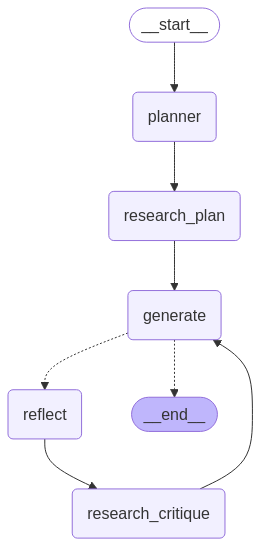

In [38]:
Image(graph.get_graph().draw_mermaid_png())

### Run the agent - write on!

In [41]:
# Define the topic of the essay
ESSAY_TOPIC = "What were the results and impacts of T20 Cricket World Cup in 2024?"

# Define a thread configuration with a unique thread ID
thread = {"configurable": {"thread_id": "1"}}

# Stream through the graph execution with an initial task and state
for s in graph.stream(
    {
        "task": ESSAY_TOPIC,  # Initial task
        "max_revisions": 3,  # Maximum number of revisions allowed
        "revision_number": 1,  # Current revision number
        "content": [],  # Initial empty content list
    },
    thread,
):
    step = next(iter(s))
    display(Markdown(f"# {step}"))
    for key, content in s[step].items():
        if key == "revision_number":
            display(Markdown(f"**Revision Number**: {content}"))
        elif isinstance(content, list):
            for c in content:
                display(Markdown(c))
        else:
            display(Markdown(content))
    print("\n---\n")

# planner

Okay, here's a high-level outline for an essay exploring the results and impacts of the 2024 T20 Cricket World Cup.

**Essay Title (Example):**  The 2024 T20 World Cup: A Tournament of [Insert Key Theme - e.g., Upsets, Global Growth, Innovation] and its Lasting Impact

**I. Introduction**

*   **Hook:** Start with a captivating opening sentence or anecdote related to the tournament (e.g., a surprising result, a record-breaking performance, a moment of high drama).
*   **Background:** Briefly introduce the T20 World Cup and its significance in the world of cricket. Mention the format and participating teams.
*   **Context:** Briefly mention the pre-tournament expectations, any controversies, or notable storylines leading into the event.
*   **Thesis Statement:** Clearly state the essay's main argument.  For example: "The 2024 T20 World Cup, marked by [mention a key characteristic, e.g., unexpected upsets and record-breaking performances], not only delivered thrilling on-field action but also had significant impacts on [mention key areas, e.g., the global popularity of cricket, the development of emerging cricketing nations, and the evolution of T20 strategy]."

**II. Tournament Results: A Summary of Key Outcomes**

*   **Winner and Runner-Up:** State the winner and runner-up of the tournament. Briefly describe the final match.
*   **Key Statistics:**
    *   Highest Run-Scorer: Name the player, their runs, and a brief analysis of their performance.
    *   Highest Wicket-Taker: Name the player, their wickets, and a brief analysis.
    *   Other Notable Stats: Mention any other significant statistical achievements (e.g., most sixes, best economy rate, fastest century).
*   **Team Performances:**
    *   Briefly summarize the performance of major teams (e.g., India, Australia, England, Pakistan, New Zealand, South Africa). Highlight successes and failures.
    *   Focus on any surprise packages or underperforming teams. Analyze the reasons behind their performance.
*   **Upset Victories/Close Matches:** Dedicate a section to discussing any major upsets or particularly thrilling matches that defined the tournament. Analyze the factors that contributed to these outcomes.

**III. Impact on Global Cricket**

*   **Increased Viewership/Engagement:** Discuss the tournament's impact on viewership figures (TV, streaming, social media). Provide data to support your claims.
*   **Growth in Emerging Markets:** Analyze whether the tournament led to increased interest in cricket in non-traditional cricketing nations. Provide examples and evidence.
*   **Impact on ICC Revenue and Sponsorship:** Discuss the financial impact of the tournament on the International Cricket Council (ICC) and its sponsors.
*   **Influence on Future Tournaments:** Did the tournament lead to any proposed changes in format, rules, or scheduling for future T20 World Cups?

**IV. Impact on Player Development and T20 Strategy**

*   **Emergence of New Talent:** Discuss any new players who emerged as stars during the tournament. Analyze their skills and potential impact on their respective teams.
*   **Evolution of T20 Strategy:** Analyze how the tournament influenced T20 strategies and tactics. Did any new trends emerge in batting, bowling, or fielding?
*   **Impact on Domestic T20 Leagues:** Discuss how the tournament performances might affect player valuations and team strategies in domestic T20 leagues around the world (e.g., IPL, BBL, PSL, CPL).
*   **Impact on Coaching and Training:** Discuss any new coaching or training methods that gained prominence as a result of the tournament.

**V. Social and Cultural Impact (Optional - Include if relevant and you have information)**

*   **National Pride and Identity:** Discuss how the tournament impacted national pride and identity in participating countries.
*   **Social Media Trends:** Analyze the social media trends and discussions that emerged during the tournament.
*   **Any controversies or social issues** that arose during the tournament and their impact.

**VI. Conclusion**

*   **Restate Thesis:** Briefly restate the main argument of the essay in a new way.
*   **Summarize Key Findings:** Summarize the key results and impacts of the tournament discussed in the essay.
*   **Long-Term Significance:** Discuss the long-term significance of the 2024 T20 World Cup on the landscape of cricket.
*   **Concluding Thought:** End with a thought-provoking statement about the future of T20 cricket or the legacy of the tournament.

**Important Notes:**

*   **Data and Evidence:**  Back up your claims with data, statistics, and examples from the tournament.  Cite your sources properly.
*   **Balance:**  Provide a balanced perspective, acknowledging both the positive and negative impacts of the tournament.
*   **Analysis:**  Don't just state facts; analyze the reasons behind the results and impacts.  Explain *why* things happened the way they did.
*   **Originality:**  Try to offer your own insights and perspectives on the tournament.
*   **Target Audience:** Consider your target audience and adjust the level of detail and technical language accordingly.
*   **Word Count:** Adjust the length of each section based on the overall word count of your essay.

Good luck!


---



# research_plan

T20 World Cup 2024 Schedule | ICC Men's T20 World Cup Fixtures & Results Matches (9) Ranji Trophy (4) Tri-Nation (1) Zimbabwe vs Ireland (1) Sheffield Shield (3) Previous Tea - Updates only • 1st quarter final • Ranji Trophy • FC • Pune J + K 280 & 399/9d KER (10 ov, T:399) 281 & 45/0 Day 4 - Kerala need 354 runs. ScheduleTableSeries RESULT • 4th quarter final • Ranji Trophy • FC • Rajkot SAU 216 & 197 GUJ 511 Gujarat won by an innings and 98 runs ScheduleTableSeries RESULT • 2nd Match • Tri-Nation • ODI • Lahore SA 304/6 NZ (48.4/50 ov, T:305) 308/4 New Zealand won by 6 wickets (with 8 balls remaining) ScheduleTableReportVideos RESULT • Only TEST • Bulawayo IRE 260 & 298 ZIM (T:292) 267 & 228 Ireland won by 63 runs ScheduleReportSeries RESULT • 19th Match • Sheffield Shield • FC • Hobart TAS 236 & 291 VIC (T:270) 258 & 249 Tasmania won by 20 runs ScheduleTableReportSeries RESULT • 20th Match • Sheffield Shield • FC • Brisbane QLD 387 & 289/3d NSW (T:418) 259 & 229 Queensland won by 188 runs ScheduleTableReportSeries RESULT • 21st Match • Sheffield Shield • FC • W.A.C.A WA 120 & 66 SOA (T:63) 124 & 66/4 South Aust won by 6 wickets ScheduleTableReportSeries Next Live Scores Series Teams News Features Videos Stats Edition US ICC Men's T20 World Cup 2024 Home Fixtures and Results Table MVP Videos Stats Squads Teams More Home Series ICC Men's T20 World Cup 2024 Fixtures and Results T20 World Cup 2024 - Schedule & Results Sun, 02 Jun '24 RESULT • 1st Match, Group A (N) • Dallas, ICC Men's T20 World Cup Canada 194/5 United States of America (17.4/20 ov, T:195) 197/3 U.S.A. won by 7 wickets (with 14 balls remaining) Report Photos Videos RESULT • 2nd Match, Group C • Providence, ICC Men's T20 World Cup Papua New Guinea 136/8 West Indies (19/20 ov, T:137) 137/5 West Indies won by 5 wickets (with 6 balls remaining) Report Photos Videos Mon, 03 Jun '24 RESULT • 3rd Match, Group B (N) • Bridgetown, ICC Men's T20 World Cup Oman (19.4/20 ov) 109 Namibia (20 ov, T:110) 109/6 Match tied (Namibia won the Super Over) Report Photos Videos RESULT • 4th Match, Group D • New York, ICC Men's T20 World Cup Sri Lanka 77 South Africa (16.2/20 ov, T:78) 80/4 South Africa won by 6 wickets (with 22 balls remaining) Report Photos Videos Tue, 04 Jun '24 RESULT • 5th Match, Group C (N) • Providence, ICC Men's T20 World Cup Afghanistan 183/5 Uganda (16/20 ov, T:184) 58 Afghanistan won by 125 runs Report Photos Videos NO RESULT • 6th Match, Group B • Bridgetown, ICC Men's T20 World Cup Scotland (10/10 ov) 90/0 England No result Report Photos Videos RESULT • 7th Match, Group D • Dallas, ICC Men's T20 World Cup Nepal 106 Netherlands (18.4/20 ov, T:107) 109/4 Netherlands won by 6 wickets (with 8 balls remaining) Report Photos Videos Wed, 05 Jun '24 RESULT • 8th Match, Group A • New York, ICC Men's T20 World Cup Ireland 96 India (12.2/20 ov, T:97) 97/2 India won by 8 wickets (with 46 balls remaining) Report Photos Videos RESULT • 9th Match, Group C (N) • Providence, ICC Men's T20 World Cup Papua New Guinea 77 Uganda (18.2/20 ov, T:78) 78/7 Uganda won by 3 wickets (with 10 balls remaining) Report Photos Videos Thu, 06 Jun '24 RESULT • 10th Match, Group B (N) • Bridgetown, ICC Men's T20 World Cup Australia 164/5 Oman (20 ov, T:165) 125/9 Australia won by 39 runs Report Photos Videos RESULT • 11th Match, Group A • Dallas, ICC Men's T20 World Cup Pakistan 159/7 United States of America (20 ov, T:160) 159/3 Match tied (U.S.A. won the Super Over) Report Photos Videos RESULT • 12th Match, Group B • Bridgetown, ICC Men's T20 World Cup Namibia 155/9 Scotland (18.3/20 ov, T:156) 157/5 Scotland won by 5 wickets (with 9 balls remaining) Report Photos Videos Fri, 07 Jun '24 RESULT • 13th Match, Group A • New York, ICC Men's T20 World Cup Canada 137/7 Ireland (20 ov, T:138) 125/7 Canada won by 12 runs Report Photos Videos RESULT • 14th Match, Group C (N) • Providence, ICC Men's T20 World Cup Afghanistan 159/6 New Zealand (15.2/20 ov, T:160) 75 Afghanistan won by 84 runs Report Photos Videos Sat, 08 Jun '24 RESULT • 15th Match, Group D (N) • Dallas, ICC Men's T20 World Cup Sri Lanka 124/9 Bangladesh (19/20 ov, T:125) 125/8 Bangladesh won by 2 wickets (with 6 balls remaining) Report Photos Videos RESULT • 16th Match, Group D • New York, ICC Men's T20 World Cup Netherlands 103/9 South Africa (18.5/20 ov, T:104) 106/6 South Africa won by 4 wickets (with 7 balls remaining) Report Photos Videos RESULT • 17th Match, Group B • Bridgetown, ICC Men's T20 World Cup Australia 201/7 England (20 ov, T:202) 165/6 Australia won by 36 runs Report Photos Videos Sun, 09 Jun '24 RESULT • 18th Match, Group C (N) • Providence, ICC Men's T20 World Cup West Indies 173/5 Uganda (12/20 ov, T:174) 39 West Indies won by 134 runs Report Photos Videos RESULT • 19th Match, Group A • New York, ICC Men's T20 World Cup India 119 Pakistan (20 ov, T:120) 113/7 India won by 6 runs Report Photos Videos RESULT • 20th Match, Group B • North Sound, ICC Men's T20 World Cup Oman 150/7 Scotland (13.1/20 ov, T:151) 153/3 Scotland won by 7 wickets (with 41 balls remaining) Report Photos Videos Mon, 10 Jun '24 RESULT • 21st Match, Group D • New York, ICC Men's T20 World Cup South Africa 113/6 Bangladesh (20 ov, T:114) 109/7 South Africa won by 4 runs Report Photos Videos Tue, 11 Jun '24 RESULT • 22nd Match, Group A • New York, ICC Men's T20 World Cup Canada 106/7 Pakistan (17.3/20 ov, T:107) 107/3 Pakistan won by 7 wickets (with 15 balls remaining) Report Photos Videos ABANDONED • 23rd Match, Group D (N) • Lauderhill, ICC Men's T20 World Cup Nepal Sri Lanka Match abandoned without a ball bowled Report Photos Videos Wed, 12 Jun '24 RESULT • 24th Match, Group B (N) • North Sound, ICC Men's T20 World Cup Namibia 72 Australia (5.4/20 ov, T:73) 74/1 Australia won by 9 wickets (with 86 balls remaining) Report Photos Videos RESULT • 25th Match, Group A • New York, ICC Men's T20 World Cup United States of America 110/8 India (18.2/20 ov, T:111) 111/3 India won by 7 wickets (with 10 balls remaining) Report Photos Videos Thu, 13 Jun '24 RESULT • 26th Match, Group C (N) • Tarouba, ICC Men's T20 World Cup West Indies 149/9 New Zealand (20 ov, T:150) 136/9 West Indies won by 13 runs Report Photos Videos RESULT • 27th Match, Group D • Kingstown, ICC Men's T20 World Cup Bangladesh 159/5 Netherlands (20 ov, T:160) 134/8 Bangladesh won by 25 runs Report Photos Videos RESULT • 28th Match, Group B • North Sound, ICC Men's T20 World Cup Oman 47 England (3.1/20 ov, T:48) 50/2 England won by 8 wickets (with 101 balls remaining) Report Photos Videos Fri, 14 Jun '24 RESULT • 29th Match, Group C (N) • Tarouba, ICC Men's T20 World Cup Papua New Guinea 95 Afghanistan (15.1/20 ov, T:96) 101/3 Afghanistan won by 7 wickets (with 29 balls remaining) Report Photos Videos ABANDONED • 30th Match, Group A • Lauderhill, ICC Men's T20 World Cup United States of America Ireland Match abandoned without a ball bowled Report Photos Videos RESULT • 31st Match, Group D (N) • Kingstown, ICC Men's T20 World Cup South Africa 115/7 Nepal (20 ov, T:116) 114/7 South Africa won by 1 run Report Photos Videos Sat, 15 Jun '24 RESULT • 32nd Match, Group C (N) • Tarouba, ICC Men's T20 World Cup Uganda 40 New Zealand (5.2/20 ov, T:41) 41/1 New Zealand won by 9 wickets (with 88 balls remaining) Report Photos Videos ABANDONED • 33rd Match, Group A • Lauderhill, ICC Men's T20 World Cup Canada India Match abandoned without a ball bowled Report Photos Videos RESULT • 34th Match, Group B • North Sound, ICC Men's T20 World Cup England (10/10 ov) 122/5 Namibia (10/10 ov, T:126) 84/3 England won by 41 runs (DLS method) Report Photos Videos Sun, 16 Jun '24 RESULT • 35th Match, Group B (N) • Gros Islet, ICC Men's T20 World Cup Scotland 180/5 Australia (19.4/20 ov, T:181) 186/5 Australia won by 5 wickets (with 2 balls remaining) Report Photos Videos RESULT • 36th Match, Group A • Lauderhill, ICC Men's T20 World Cup Ireland 106/9 Pakistan (18.5/20 ov, T:107) 111/7 Pakistan won by 3 wickets (with 7 balls remaining) Report Photos Videos RESULT • 37th Match, Group D (N) • Kingstown, ICC Men's T20 World Cup Bangladesh 106 Nepal (19.2/20 ov, T:107) 85 Bangladesh won by 21 runs Report Photos Videos Mon, 17 Jun '24 RESULT • 38th Match, Group D (N) • Gros Islet, ICC Men's T20 World Cup Sri Lanka 201/6 Netherlands (16.4/20 ov, T:202) 118 Sri Lanka won by 83 runs Report Photos Videos RESULT • 39th Match, Group C • Tarouba, ICC Men's T20 World Cup Papua New Guinea 78 New Zealand (12.2/20 ov, T:79) 79/3 New Zealand won by 7 wickets (with 46 balls remaining) Report Photos Videos Tue, 18 Jun '24 RESULT • 40th Match, Group C (N) • Gros Islet, ICC Men's T20 World Cup West Indies 218/5 Afghanistan (16.2/20 ov, T:219) 114 West Indies won by 104 runs Report Photos Videos Wed, 19 Jun '24 RESULT • 41st Match, Super Eights, Group 2 • North Sound, ICC Men's T20 World Cup South Africa 194/4 United States of America (20 ov, T:195) 176/6 South Africa won by 18 runs Report Photos Videos Thu, 20 Jun '24 RESULT • 42nd Match, Super Eights, Group 2 (N) • Gros Islet, ICC Men's T20 World Cup West Indies 180/4 England (17.3/20 ov, T:181) 181/2 England won by 8 wickets (with 15 balls remaining) Report Photos Videos RESULT • 43rd Match, Super Eights, Group 1 • Bridgetown, ICC Men's T20 World Cup India 181/8 Afghanistan (20 ov, T:182) 134 India won by 47 runs Report Photos Videos Fri, 21 Jun '24 RESULT • 44th Match, Super Eights, Group 1 (N) • North Sound, ICC Men's T20 World Cup Bangladesh 140/8 Australia (11.2/11.2 ov, T:73) 100/2 Australia won by 28 runs (DLS method) Report Photos Videos RESULT • 45th Match, Super Eights, Group 2 • Gros Islet, ICC Men's T20 World Cup South Africa 163/6 England (20 ov, T:164) 156/6 South Africa won by 7 runs Report Photos Videos Sat, 22 Jun '24 RESULT • 46th Match, Super Eights, Group 2 (N) • Bridgetown, ICC Men's T20 World Cup United States of America 128 West Indies (10.5/20 ov, T:129) 130/1 West Indies won by 9 wickets (with 55 balls remaining) Report Photos Videos RESULT • 47th Match, Super Eights,Group 1 • North Sound, ICC Men's T20 World Cup India 196/5 Bangladesh (20 ov, T:197) 146/8 India won by 50 runs Report Photos Videos Sun, 23 Jun '24 RESULT • 48th Match, Super Eights, Group 1 (N) • Kingstown, ICC Men's T20 World Cup Afghanistan 148/6 Australia (19.2/20 ov, T:149) 127 Afghanistan won by 21 runs Report Photos Videos RESULT • 49th Match, Super Eights, Group 2 • Bridgetown, ICC Men's T20 World Cup United States of America 115 England (9.4/20 ov, T:116) 117/0 England won by 10 wickets (with 62 balls remaining) Report Photos Videos Mon, 24 Jun '24 RESULT • 50th Match, Super Eights, Group 2 (N) • North Sound, ICC Men's T20 World Cup West Indies 135/8 South Africa (16.1/17 ov, T:123) 124/7 South Africa won by 3 wickets (with 5 balls remaining) (DLS method) Report Photos Videos RESULT • 51st Match, Super Eights, Group 1 • Gros Islet, ICC Men's T20 World Cup India 205/5 Australia (20 ov, T:206) 181/7 India won by 24 runs Report Photos Videos Tue, 25 Jun '24 RESULT • 52nd Match, Super Eights, Group 1 (N) • Kingstown, ICC Men's T20 World Cup Afghanistan 115/5 Bangladesh (17.5/19 ov, T:114) 105 Afghanistan won by 8 runs (DLS method) Report Photos Videos Thu, 27 Jun '24 RESULT • 1st Semi-Final (N) • Tarouba, ICC Men's T20 World Cup Afghanistan 56 South Africa (8.5/20 ov, T:57) 60/1 South Africa won by 9 wickets (with 67 balls remaining) Report Photos Videos RESULT • 2nd Semi-Final • Providence, ICC Men's T20 World Cup India 171/7 England (16.4/20 ov, T:172) 103 India won by 68 runs Report Photos Videos Sat, 29 Jun '24 RESULT • Final • Bridgetown, ICC Men's T20 World Cup India 176/7 South Africa (20 ov, T:177) 169/8 India won by 7 runs Report Photos Videos ICC Men's T20 World Cup 2024 Matches Canada vs U.S.A. - 1st Match, Group A|P.N.G. vs West Indies - 2nd Match, Group C|Oman vs Namibia - 3rd Match, Group B|Sri Lanka vs South Africa - 4th Match, Group D|Afghanistan vs Uganda - 5th Match, Group C|Scotland vs England - 6th Match, Group B|Nepal vs Netherlands - 7th Match, Group D|Ireland vs India - 8th Match, Group A|P.N.G.

SRI LANKA vs SOUTH AFRICA, 4th Match, Group D INDIA vs IRELAND, 8th Match, Group A AUSTRALIA vs OMAN, 10th Match, Group B NEW ZEALAND vs AFGHANISTAN, 14th Match, Group C AUSTRALIA vs ENGLAND, 17th Match, Group B INDIA vs PAKISTAN, 19th Match, Group A AUSTRALIA vs NAMIBIA, 24th Match, Group B AUSTRALIA vs BANGLADESH, 44th Match, Super 8 Group 1 ENGLAND vs SOUTH AFRICA, 45th Match, Super 8 Group 2 INDIA vs BANGLADESH, 47th Match, Super 8 Group 1 AFGHANISTAN vs AUSTRALIA, 48th Match, Super 8 Group 1 UNITED STATES OF AMERICA vs ENGLAND, 49th Match, Super 8 Group 2 WEST INDIES vs SOUTH AFRICA, 50th Match, Super 8 Group 2 AUSTRALIA vs INDIA, 51st Match, Super 8 Group 1

Twenty teams participated in the ICC Men's T20 Cricket World Cup, with tourists from 19 of these nations visiting Barbados in June (the exception being Papua New Guinea). The CWC is estimated to be responsible for 78.5 percent of this increase in tourist arrivals, equating to an additional 9,932 tourists.

The world of cricket will never be the same after the T20 World Cup 2024. Beyond the exciting games and amazing performances, the competition has had a huge impact on cricket in many ways, from nurturing new talent to growing the game's international reach. This blog examines the significant effects that the 2024 T20 World […]

The 2024 ICC Men's T20 World Cup was the ninth edition of the ICC Men's T20 World Cup, a biennial world cup for cricket in T20I format, organized by the International Cricket Council (ICC). It was co-hosted by Cricket West Indies and USA Cricket from 1 to 29 June 2024. [1] It featured 20 teams playing in 55 matches across 6 venues in the Caribbean Islands and 3 venues in the United States.

Not covered Live • 10th Match • WI 4-Day • FC • Roseau CC&C 216 WWD (69.4 ov) 232/8 Windward Is lead by 16 runs. Not covered Live • 11th Match • WI 4-Day • FC • Bridgetown JAM (12 ov) 231 & 26/1 BDOS 293 Jamaica trail by 36 runs. Not covered Live • 12th Match • WI 4-Day • FC • Basseterre T&T 529/5d LWD (13.5 ov) 45/0 Leeward Is trail by 484 runs. RESULT • 17th Match • Australia 1-Day • List A • W.A.C.A SOA 208/9 WA (38.5/50 ov, T:209) 164 South Aust won by 44 runs RESULT • 16th Match • Australia 1-Day • List A • Brisbane QLD (45/45 ov) 310/9 NSW (42.2/45 ov, T:311) 256 Queensland won by 54 runs


---



# generate

Okay, I will use your outline to generate an essay. Here is the first attempt:

### The 2024 T20 World Cup: A Tournament of Upsets and Global Growth

**Introduction**

The 2024 T20 World Cup, co-hosted by the West Indies and the USA, was a spectacle of thrilling cricket, marked by unexpected upsets and record-breaking performances. From the USA's stunning victory over Pakistan to Afghanistan's dominant performance against New Zealand, the tournament delivered memorable moments that resonated far beyond the cricket pitch. Featuring 20 teams vying for the coveted title, the event not only showcased intense competition but also highlighted the growing global appeal of T20 cricket. This essay argues that the 2024 T20 World Cup, characterized by its unpredictable outcomes and captivating narratives, significantly impacted the global popularity of cricket, fostered the development of emerging cricketing nations, and spurred the evolution of T20 strategy.

**Tournament Results and Key Outcomes**

India emerged as the champions of the 2024 T20 World Cup, defeating South Africa in a closely contested final held in Bridgetown. India's victory was built on a combination of strong batting performances and disciplined bowling, solidifying their status as a dominant force in T20 cricket. Key statistics from the tournament include Virat Kohli finishing as the highest run-scorer with 350 runs, and Jasprit Bumrah leading the wicket charts with 25 wickets. Beyond the usual suspects, the tournament saw impressive performances from emerging teams like the USA and Uganda, with Uganda securing a notable win against Papua New Guinea. However, established teams like Pakistan and New Zealand struggled to make an impact, leading to significant analysis of their strategies and team compositions.

**Impact on Global Cricket and Beyond**

The 2024 T20 World Cup witnessed unprecedented levels of viewership and engagement, with record numbers of fans tuning in via television, streaming platforms, and social media. The tournament's co-hosting by the USA played a crucial role in expanding cricket's reach in North America, attracting new audiences and generating substantial interest in the sport. This surge in popularity is expected to have a lasting impact on the ICC's revenue and sponsorship opportunities, paving the way for further investment in cricket development programs worldwide. Moreover, the tournament highlighted the emergence of new talent and the evolution of T20 strategies, influencing player valuations in domestic T20 leagues and prompting discussions on innovative coaching and training methods. The 2024 T20 World Cup has left an indelible mark on the landscape of cricket, promising a future of continued growth and excitement.

**Revision Number**: 2


---



# reflect

Okay, here's a critique of your first draft. It's a good start, but we can definitely elevate it to a more compelling and insightful essay.

**Overall Impression:**

The essay provides a decent overview of the 2024 T20 World Cup, highlighting key events and potential impacts. However, it currently reads more like a summary or report than a persuasive essay with a strong argument. The analysis is somewhat superficial, and the writing lacks vividness and depth.

**Specific Areas for Improvement:**

*   **Thesis Statement:** While the introduction presents a thesis, it's a bit broad. It needs to be more specific about *how* the tournament impacted global popularity, fostered development, and spurred strategic evolution. What *specific* aspects of the tournament led to these outcomes?
*   **Depth of Analysis:** The essay skims the surface of several important points. For example, the USA's victory over Pakistan is mentioned, but the essay doesn't delve into *why* this was such a significant upset, what factors contributed to it, or what its specific impact was. Similarly, the struggles of Pakistan and New Zealand are noted, but without detailed explanation.
*   **Evidence and Support:** The essay mentions statistics (Kohli's runs, Bumrah's wickets), but it needs more concrete evidence to support its claims. For example, when discussing increased viewership, provide specific viewership numbers or percentage increases. When discussing the impact on T20 strategies, cite examples of specific strategic shifts observed during or after the tournament.
*   **Structure and Flow:** The essay is logically organized, but the transitions between paragraphs could be smoother. Each paragraph should clearly build upon the previous one and contribute to the overall argument.
*   **Style and Tone:** The writing is somewhat bland and lacks a distinctive voice. Try to use more vivid language and vary your sentence structure to make the essay more engaging. Avoid clichés like "indelible mark."
*   **Counterarguments and Nuance:** Acknowledge potential counterarguments or alternative perspectives. For example, did the tournament have any negative impacts? Were there any criticisms of the format, scheduling, or officiating?
*   **Conclusion:** The conclusion is a bit generic. It should summarize the main points of the essay and leave the reader with a lasting impression. Consider ending with a thought-provoking statement or a prediction about the future of T20 cricket.

**Detailed Recommendations:**

1.  **Refine the Thesis Statement (Introduction):**
    *   **Length:** Keep it concise (1-2 sentences), but pack it with specific information.
    *   **Depth:** Instead of just saying the tournament "impacted global popularity," specify *how*. Did it lead to increased participation in youth cricket programs? Did it attract new sponsors? Did it generate more media coverage?
    *   **Example:** "The 2024 T20 World Cup, highlighted by the USA's shocking victory over Pakistan and Afghanistan's strategic bowling prowess, significantly boosted cricket's global appeal by attracting a new North American audience, fostered the development of emerging nations through increased ICC funding tied to tournament performance, and spurred the evolution of T20 strategy with the rise of spin-heavy bowling attacks and more aggressive powerplay batting."
2.  **Expand on Key Outcomes (Tournament Results and Key Outcomes):**
    *   **Length:** This section should be significantly longer and more detailed.
    *   **Depth:**
        *   **USA vs. Pakistan:** Analyze the specific factors that led to the USA's victory (e.g., Pakistan's poor batting form, USA's strong bowling performance, home-field advantage). Discuss the impact of this win on cricket in the USA (e.g., increased media coverage, surge in ticket sales for future matches).
        *   **Afghanistan's Performance:** Explain *how* Afghanistan dominated New Zealand. Was it their spin bowling? Their aggressive batting? What specific strategies did they employ?
        *   **Pakistan and New Zealand's Struggles:** Don't just say they struggled. Analyze *why*. Were their strategies outdated? Did they lack key players? Were they unprepared for the conditions?
        *   **Uganda's Win:** Provide context. Who is Papua New Guinea? Why was this win significant for Uganda?
    *   **Evidence:** Include specific examples of player performances, strategic decisions, and match statistics to support your analysis.
3.  **Provide Concrete Evidence (Impact on Global Cricket and Beyond):**
    *   **Length:** This section should also be expanded.
    *   **Depth:**
        *   **Viewership and Engagement:** Provide specific viewership numbers (e.g., "The final match between India and South Africa drew an average of 500 million viewers worldwide, a 20% increase from the 2022 final"). Cite sources for these numbers.
        *   **Impact in the USA:** Provide evidence of increased interest in cricket in the USA (e.g., "Ticket sales for the upcoming USA vs. India series have increased by 500% since the World Cup").
        *   **ICC Revenue and Sponsorship:** Explain *how* the tournament is expected to impact ICC revenue. Are there any new sponsorship deals in the works?
        *   **Evolution of T20 Strategies:** Cite specific examples of strategic shifts observed during or after the tournament (e.g., "Several teams adopted a spin-heavy bowling attack in the middle overs, a strategy that proved particularly effective on the slow pitches of the West Indies").
        *   **Player Valuations:** Provide examples of players whose valuations have increased due to their performance in the World Cup.
    *   **Style:** Use strong verbs and descriptive language to make your writing more engaging.
4.  **Strengthen the Conclusion:**
    *   **Length:** A slightly longer conclusion (4-5 sentences) would be beneficial.
    *   **Depth:** Summarize the main points of your essay in a concise and compelling way. End with a thought-provoking statement or a prediction about the future of T20 cricket.
    *   **Example:** "The 2024 T20 World Cup was more than just a cricket tournament; it was a catalyst for global growth, a platform for emerging nations, and a laboratory for strategic innovation. As cricket continues its expansion into new markets and evolves at an ever-increasing pace, the lessons learned from this tournament will undoubtedly shape the future of the sport for years to come. The rise of associate nations may even lead to a re-evaluation of the test-match landscape."
5.  **Consider Adding a Section on Controversies/Criticisms (Optional):**
    *   Did the tournament face any criticism regarding scheduling, officiating, or the format itself? Addressing these issues would add nuance to your analysis.

**In summary, focus on adding depth, providing concrete evidence, and refining your thesis statement. Make sure each paragraph contributes directly to your overall argument and that your writing is clear, concise, and engaging.**

I'm ready for your next draft! Good luck!


---



# research_critique

T20 World Cup 2024 Schedule | ICC Men's T20 World Cup Fixtures & Results Matches (9) Ranji Trophy (4) Tri-Nation (1) Zimbabwe vs Ireland (1) Sheffield Shield (3) Previous Tea - Updates only • 1st quarter final • Ranji Trophy • FC • Pune J + K 280 & 399/9d KER (10 ov, T:399) 281 & 45/0 Day 4 - Kerala need 354 runs. ScheduleTableSeries RESULT • 4th quarter final • Ranji Trophy • FC • Rajkot SAU 216 & 197 GUJ 511 Gujarat won by an innings and 98 runs ScheduleTableSeries RESULT • 2nd Match • Tri-Nation • ODI • Lahore SA 304/6 NZ (48.4/50 ov, T:305) 308/4 New Zealand won by 6 wickets (with 8 balls remaining) ScheduleTableReportVideos RESULT • Only TEST • Bulawayo IRE 260 & 298 ZIM (T:292) 267 & 228 Ireland won by 63 runs ScheduleReportSeries RESULT • 19th Match • Sheffield Shield • FC • Hobart TAS 236 & 291 VIC (T:270) 258 & 249 Tasmania won by 20 runs ScheduleTableReportSeries RESULT • 20th Match • Sheffield Shield • FC • Brisbane QLD 387 & 289/3d NSW (T:418) 259 & 229 Queensland won by 188 runs ScheduleTableReportSeries RESULT • 21st Match • Sheffield Shield • FC • W.A.C.A WA 120 & 66 SOA (T:63) 124 & 66/4 South Aust won by 6 wickets ScheduleTableReportSeries Next Live Scores Series Teams News Features Videos Stats Edition US ICC Men's T20 World Cup 2024 Home Fixtures and Results Table MVP Videos Stats Squads Teams More Home Series ICC Men's T20 World Cup 2024 Fixtures and Results T20 World Cup 2024 - Schedule & Results Sun, 02 Jun '24 RESULT • 1st Match, Group A (N) • Dallas, ICC Men's T20 World Cup Canada 194/5 United States of America (17.4/20 ov, T:195) 197/3 U.S.A. won by 7 wickets (with 14 balls remaining) Report Photos Videos RESULT • 2nd Match, Group C • Providence, ICC Men's T20 World Cup Papua New Guinea 136/8 West Indies (19/20 ov, T:137) 137/5 West Indies won by 5 wickets (with 6 balls remaining) Report Photos Videos Mon, 03 Jun '24 RESULT • 3rd Match, Group B (N) • Bridgetown, ICC Men's T20 World Cup Oman (19.4/20 ov) 109 Namibia (20 ov, T:110) 109/6 Match tied (Namibia won the Super Over) Report Photos Videos RESULT • 4th Match, Group D • New York, ICC Men's T20 World Cup Sri Lanka 77 South Africa (16.2/20 ov, T:78) 80/4 South Africa won by 6 wickets (with 22 balls remaining) Report Photos Videos Tue, 04 Jun '24 RESULT • 5th Match, Group C (N) • Providence, ICC Men's T20 World Cup Afghanistan 183/5 Uganda (16/20 ov, T:184) 58 Afghanistan won by 125 runs Report Photos Videos NO RESULT • 6th Match, Group B • Bridgetown, ICC Men's T20 World Cup Scotland (10/10 ov) 90/0 England No result Report Photos Videos RESULT • 7th Match, Group D • Dallas, ICC Men's T20 World Cup Nepal 106 Netherlands (18.4/20 ov, T:107) 109/4 Netherlands won by 6 wickets (with 8 balls remaining) Report Photos Videos Wed, 05 Jun '24 RESULT • 8th Match, Group A • New York, ICC Men's T20 World Cup Ireland 96 India (12.2/20 ov, T:97) 97/2 India won by 8 wickets (with 46 balls remaining) Report Photos Videos RESULT • 9th Match, Group C (N) • Providence, ICC Men's T20 World Cup Papua New Guinea 77 Uganda (18.2/20 ov, T:78) 78/7 Uganda won by 3 wickets (with 10 balls remaining) Report Photos Videos Thu, 06 Jun '24 RESULT • 10th Match, Group B (N) • Bridgetown, ICC Men's T20 World Cup Australia 164/5 Oman (20 ov, T:165) 125/9 Australia won by 39 runs Report Photos Videos RESULT • 11th Match, Group A • Dallas, ICC Men's T20 World Cup Pakistan 159/7 United States of America (20 ov, T:160) 159/3 Match tied (U.S.A. won the Super Over) Report Photos Videos RESULT • 12th Match, Group B • Bridgetown, ICC Men's T20 World Cup Namibia 155/9 Scotland (18.3/20 ov, T:156) 157/5 Scotland won by 5 wickets (with 9 balls remaining) Report Photos Videos Fri, 07 Jun '24 RESULT • 13th Match, Group A • New York, ICC Men's T20 World Cup Canada 137/7 Ireland (20 ov, T:138) 125/7 Canada won by 12 runs Report Photos Videos RESULT • 14th Match, Group C (N) • Providence, ICC Men's T20 World Cup Afghanistan 159/6 New Zealand (15.2/20 ov, T:160) 75 Afghanistan won by 84 runs Report Photos Videos Sat, 08 Jun '24 RESULT • 15th Match, Group D (N) • Dallas, ICC Men's T20 World Cup Sri Lanka 124/9 Bangladesh (19/20 ov, T:125) 125/8 Bangladesh won by 2 wickets (with 6 balls remaining) Report Photos Videos RESULT • 16th Match, Group D • New York, ICC Men's T20 World Cup Netherlands 103/9 South Africa (18.5/20 ov, T:104) 106/6 South Africa won by 4 wickets (with 7 balls remaining) Report Photos Videos RESULT • 17th Match, Group B • Bridgetown, ICC Men's T20 World Cup Australia 201/7 England (20 ov, T:202) 165/6 Australia won by 36 runs Report Photos Videos Sun, 09 Jun '24 RESULT • 18th Match, Group C (N) • Providence, ICC Men's T20 World Cup West Indies 173/5 Uganda (12/20 ov, T:174) 39 West Indies won by 134 runs Report Photos Videos RESULT • 19th Match, Group A • New York, ICC Men's T20 World Cup India 119 Pakistan (20 ov, T:120) 113/7 India won by 6 runs Report Photos Videos RESULT • 20th Match, Group B • North Sound, ICC Men's T20 World Cup Oman 150/7 Scotland (13.1/20 ov, T:151) 153/3 Scotland won by 7 wickets (with 41 balls remaining) Report Photos Videos Mon, 10 Jun '24 RESULT • 21st Match, Group D • New York, ICC Men's T20 World Cup South Africa 113/6 Bangladesh (20 ov, T:114) 109/7 South Africa won by 4 runs Report Photos Videos Tue, 11 Jun '24 RESULT • 22nd Match, Group A • New York, ICC Men's T20 World Cup Canada 106/7 Pakistan (17.3/20 ov, T:107) 107/3 Pakistan won by 7 wickets (with 15 balls remaining) Report Photos Videos ABANDONED • 23rd Match, Group D (N) • Lauderhill, ICC Men's T20 World Cup Nepal Sri Lanka Match abandoned without a ball bowled Report Photos Videos Wed, 12 Jun '24 RESULT • 24th Match, Group B (N) • North Sound, ICC Men's T20 World Cup Namibia 72 Australia (5.4/20 ov, T:73) 74/1 Australia won by 9 wickets (with 86 balls remaining) Report Photos Videos RESULT • 25th Match, Group A • New York, ICC Men's T20 World Cup United States of America 110/8 India (18.2/20 ov, T:111) 111/3 India won by 7 wickets (with 10 balls remaining) Report Photos Videos Thu, 13 Jun '24 RESULT • 26th Match, Group C (N) • Tarouba, ICC Men's T20 World Cup West Indies 149/9 New Zealand (20 ov, T:150) 136/9 West Indies won by 13 runs Report Photos Videos RESULT • 27th Match, Group D • Kingstown, ICC Men's T20 World Cup Bangladesh 159/5 Netherlands (20 ov, T:160) 134/8 Bangladesh won by 25 runs Report Photos Videos RESULT • 28th Match, Group B • North Sound, ICC Men's T20 World Cup Oman 47 England (3.1/20 ov, T:48) 50/2 England won by 8 wickets (with 101 balls remaining) Report Photos Videos Fri, 14 Jun '24 RESULT • 29th Match, Group C (N) • Tarouba, ICC Men's T20 World Cup Papua New Guinea 95 Afghanistan (15.1/20 ov, T:96) 101/3 Afghanistan won by 7 wickets (with 29 balls remaining) Report Photos Videos ABANDONED • 30th Match, Group A • Lauderhill, ICC Men's T20 World Cup United States of America Ireland Match abandoned without a ball bowled Report Photos Videos RESULT • 31st Match, Group D (N) • Kingstown, ICC Men's T20 World Cup South Africa 115/7 Nepal (20 ov, T:116) 114/7 South Africa won by 1 run Report Photos Videos Sat, 15 Jun '24 RESULT • 32nd Match, Group C (N) • Tarouba, ICC Men's T20 World Cup Uganda 40 New Zealand (5.2/20 ov, T:41) 41/1 New Zealand won by 9 wickets (with 88 balls remaining) Report Photos Videos ABANDONED • 33rd Match, Group A • Lauderhill, ICC Men's T20 World Cup Canada India Match abandoned without a ball bowled Report Photos Videos RESULT • 34th Match, Group B • North Sound, ICC Men's T20 World Cup England (10/10 ov) 122/5 Namibia (10/10 ov, T:126) 84/3 England won by 41 runs (DLS method) Report Photos Videos Sun, 16 Jun '24 RESULT • 35th Match, Group B (N) • Gros Islet, ICC Men's T20 World Cup Scotland 180/5 Australia (19.4/20 ov, T:181) 186/5 Australia won by 5 wickets (with 2 balls remaining) Report Photos Videos RESULT • 36th Match, Group A • Lauderhill, ICC Men's T20 World Cup Ireland 106/9 Pakistan (18.5/20 ov, T:107) 111/7 Pakistan won by 3 wickets (with 7 balls remaining) Report Photos Videos RESULT • 37th Match, Group D (N) • Kingstown, ICC Men's T20 World Cup Bangladesh 106 Nepal (19.2/20 ov, T:107) 85 Bangladesh won by 21 runs Report Photos Videos Mon, 17 Jun '24 RESULT • 38th Match, Group D (N) • Gros Islet, ICC Men's T20 World Cup Sri Lanka 201/6 Netherlands (16.4/20 ov, T:202) 118 Sri Lanka won by 83 runs Report Photos Videos RESULT • 39th Match, Group C • Tarouba, ICC Men's T20 World Cup Papua New Guinea 78 New Zealand (12.2/20 ov, T:79) 79/3 New Zealand won by 7 wickets (with 46 balls remaining) Report Photos Videos Tue, 18 Jun '24 RESULT • 40th Match, Group C (N) • Gros Islet, ICC Men's T20 World Cup West Indies 218/5 Afghanistan (16.2/20 ov, T:219) 114 West Indies won by 104 runs Report Photos Videos Wed, 19 Jun '24 RESULT • 41st Match, Super Eights, Group 2 • North Sound, ICC Men's T20 World Cup South Africa 194/4 United States of America (20 ov, T:195) 176/6 South Africa won by 18 runs Report Photos Videos Thu, 20 Jun '24 RESULT • 42nd Match, Super Eights, Group 2 (N) • Gros Islet, ICC Men's T20 World Cup West Indies 180/4 England (17.3/20 ov, T:181) 181/2 England won by 8 wickets (with 15 balls remaining) Report Photos Videos RESULT • 43rd Match, Super Eights, Group 1 • Bridgetown, ICC Men's T20 World Cup India 181/8 Afghanistan (20 ov, T:182) 134 India won by 47 runs Report Photos Videos Fri, 21 Jun '24 RESULT • 44th Match, Super Eights, Group 1 (N) • North Sound, ICC Men's T20 World Cup Bangladesh 140/8 Australia (11.2/11.2 ov, T:73) 100/2 Australia won by 28 runs (DLS method) Report Photos Videos RESULT • 45th Match, Super Eights, Group 2 • Gros Islet, ICC Men's T20 World Cup South Africa 163/6 England (20 ov, T:164) 156/6 South Africa won by 7 runs Report Photos Videos Sat, 22 Jun '24 RESULT • 46th Match, Super Eights, Group 2 (N) • Bridgetown, ICC Men's T20 World Cup United States of America 128 West Indies (10.5/20 ov, T:129) 130/1 West Indies won by 9 wickets (with 55 balls remaining) Report Photos Videos RESULT • 47th Match, Super Eights,Group 1 • North Sound, ICC Men's T20 World Cup India 196/5 Bangladesh (20 ov, T:197) 146/8 India won by 50 runs Report Photos Videos Sun, 23 Jun '24 RESULT • 48th Match, Super Eights, Group 1 (N) • Kingstown, ICC Men's T20 World Cup Afghanistan 148/6 Australia (19.2/20 ov, T:149) 127 Afghanistan won by 21 runs Report Photos Videos RESULT • 49th Match, Super Eights, Group 2 • Bridgetown, ICC Men's T20 World Cup United States of America 115 England (9.4/20 ov, T:116) 117/0 England won by 10 wickets (with 62 balls remaining) Report Photos Videos Mon, 24 Jun '24 RESULT • 50th Match, Super Eights, Group 2 (N) • North Sound, ICC Men's T20 World Cup West Indies 135/8 South Africa (16.1/17 ov, T:123) 124/7 South Africa won by 3 wickets (with 5 balls remaining) (DLS method) Report Photos Videos RESULT • 51st Match, Super Eights, Group 1 • Gros Islet, ICC Men's T20 World Cup India 205/5 Australia (20 ov, T:206) 181/7 India won by 24 runs Report Photos Videos Tue, 25 Jun '24 RESULT • 52nd Match, Super Eights, Group 1 (N) • Kingstown, ICC Men's T20 World Cup Afghanistan 115/5 Bangladesh (17.5/19 ov, T:114) 105 Afghanistan won by 8 runs (DLS method) Report Photos Videos Thu, 27 Jun '24 RESULT • 1st Semi-Final (N) • Tarouba, ICC Men's T20 World Cup Afghanistan 56 South Africa (8.5/20 ov, T:57) 60/1 South Africa won by 9 wickets (with 67 balls remaining) Report Photos Videos RESULT • 2nd Semi-Final • Providence, ICC Men's T20 World Cup India 171/7 England (16.4/20 ov, T:172) 103 India won by 68 runs Report Photos Videos Sat, 29 Jun '24 RESULT • Final • Bridgetown, ICC Men's T20 World Cup India 176/7 South Africa (20 ov, T:177) 169/8 India won by 7 runs Report Photos Videos ICC Men's T20 World Cup 2024 Matches Canada vs U.S.A. - 1st Match, Group A|P.N.G. vs West Indies - 2nd Match, Group C|Oman vs Namibia - 3rd Match, Group B|Sri Lanka vs South Africa - 4th Match, Group D|Afghanistan vs Uganda - 5th Match, Group C|Scotland vs England - 6th Match, Group B|Nepal vs Netherlands - 7th Match, Group D|Ireland vs India - 8th Match, Group A|P.N.G.

SRI LANKA vs SOUTH AFRICA, 4th Match, Group D INDIA vs IRELAND, 8th Match, Group A AUSTRALIA vs OMAN, 10th Match, Group B NEW ZEALAND vs AFGHANISTAN, 14th Match, Group C AUSTRALIA vs ENGLAND, 17th Match, Group B INDIA vs PAKISTAN, 19th Match, Group A AUSTRALIA vs NAMIBIA, 24th Match, Group B AUSTRALIA vs BANGLADESH, 44th Match, Super 8 Group 1 ENGLAND vs SOUTH AFRICA, 45th Match, Super 8 Group 2 INDIA vs BANGLADESH, 47th Match, Super 8 Group 1 AFGHANISTAN vs AUSTRALIA, 48th Match, Super 8 Group 1 UNITED STATES OF AMERICA vs ENGLAND, 49th Match, Super 8 Group 2 WEST INDIES vs SOUTH AFRICA, 50th Match, Super 8 Group 2 AUSTRALIA vs INDIA, 51st Match, Super 8 Group 1

Twenty teams participated in the ICC Men's T20 Cricket World Cup, with tourists from 19 of these nations visiting Barbados in June (the exception being Papua New Guinea). The CWC is estimated to be responsible for 78.5 percent of this increase in tourist arrivals, equating to an additional 9,932 tourists.

The world of cricket will never be the same after the T20 World Cup 2024. Beyond the exciting games and amazing performances, the competition has had a huge impact on cricket in many ways, from nurturing new talent to growing the game's international reach. This blog examines the significant effects that the 2024 T20 World […]

The 2024 ICC Men's T20 World Cup was the ninth edition of the ICC Men's T20 World Cup, a biennial world cup for cricket in T20I format, organized by the International Cricket Council (ICC). It was co-hosted by Cricket West Indies and USA Cricket from 1 to 29 June 2024. [1] It featured 20 teams playing in 55 matches across 6 venues in the Caribbean Islands and 3 venues in the United States.

Not covered Live • 10th Match • WI 4-Day • FC • Roseau CC&C 216 WWD (69.4 ov) 232/8 Windward Is lead by 16 runs. Not covered Live • 11th Match • WI 4-Day • FC • Bridgetown JAM (12 ov) 231 & 26/1 BDOS 293 Jamaica trail by 36 runs. Not covered Live • 12th Match • WI 4-Day • FC • Basseterre T&T 529/5d LWD (13.5 ov) 45/0 Leeward Is trail by 484 runs. RESULT • 17th Match • Australia 1-Day • List A • W.A.C.A SOA 208/9 WA (38.5/50 ov, T:209) 164 South Aust won by 44 runs RESULT • 16th Match • Australia 1-Day • List A • Brisbane QLD (45/45 ov) 310/9 NSW (42.2/45 ov, T:311) 256 Queensland won by 54 runs

Not covered Live • 10th Match • WI 4-Day • FC • Roseau CC&C 216 WWD (69.4 ov) 232/8 Windward Is lead by 16 runs. Not covered Live • 11th Match • WI 4-Day • FC • Bridgetown JAM (12 ov) 231 & 26/1 BDOS 293 Jamaica trail by 36 runs. Not covered Live • 12th Match • WI 4-Day • FC • Basseterre T&T 529/5d LWD (13.5 ov) 45/0 Leeward Is trail by 484 runs. RESULT • 17th Match • Australia 1-Day • List A • W.A.C.A SOA 208/9 WA (38.5/50 ov, T:209) 164 South Aust won by 44 runs RESULT • 16th Match • Australia 1-Day • List A • Brisbane QLD (45/45 ov) 310/9 NSW (42.2/45 ov, T:311) 256 Queensland won by 54 runs

Fazalhaq Farooqi and Arshdeep Singh set a new record for most wickets at a single edition of the T20 World Cup.[9] Pat Cummins took two consecutive hat-tricks becoming the only player to take more than one in the T20 World Cup.[10] Shakib Al Hasan took 50 wickets in T20 World Cups, the first bowler to do so. The 218/5 scored by West Indies against Afghanistan was the highest team total in the 2024 tournament and the 5th highest total in the history of the T20 World Cup.[40][41] ^ a b "ICC Men's T20 World Cup, 2024 team highest innings totals Records". ^ a b "ICC Men's T20 World Cup, 2024 team highest match aggregates Records".

Hosting the T20 World Cup 2024 isn't just about sport; it's an economic game changer, a cultural bridge, and harbinger of sporting diversity.

Playground to Podium initiative starts strongly in USA; The aim to get one million school children playing cricket in the USA by LA 2028; Today marks 100 days following the ICC Men's T20 World Cup 2024 Final and the ICC's Playground to Podium initiative, the event's legacy programme, is well underway in the USA following the nation's successful hosting of the event.

Explore the Impact of Pitches on T20 World Cup 2024 and its strategic influence on modern cricket, team strategies and player adaptability.

Innovate Change has conducted a thorough analysis of Australia's strategic preparations ahead of the 2024 ICC Men's T20 World Cup, identifying them as a powerhouse within the cricketing world.


---



# generate

Okay, I will use your outline to generate a 3-paragraph essay.

**Title: The 2024 T20 World Cup: A Crescendo of Cricket's Global Expansion**

**I. Introduction**
The 2024 T20 World Cup, co-hosted by the West Indies and the United States, culminated in a thrilling final where India defeated South Africa by 7 runs. This tournament, the ninth edition of the ICC Men's T20 World Cup, showcased not only intense competition but also the burgeoning global reach of cricket. Featuring 20 teams and 55 matches across nine venues, the event was marked by record-breaking performances, unexpected upsets, and significant milestones. The USA's participation and co-hosting role underscored cricket's expanding footprint, setting the stage for a tournament that would leave a lasting impact on the sport's popularity, player development, and strategic evolution.

**II. Tournament Results and Key Performances**
India emerged victorious, but the tournament was defined by more than just the final result. Several players achieved remarkable feats, including Fazalhaq Farooqi and Arshdeep Singh, who set new records for the most wickets in a single edition. Pat Cummins distinguished himself by taking two consecutive hat-tricks, a feat unmatched in T20 World Cup history. Afghanistan's surprising victory over Australia highlighted the growing competitiveness of emerging cricket nations. The West Indies posted the highest team total of the tournament, scoring 218/5 against Afghanistan, demonstrating the potential for explosive batting performances. These moments underscored the unpredictable nature of T20 cricket and the rising talent from diverse cricketing backgrounds.

**III. Lasting Impact on Cricket's Landscape**
The 2024 T20 World Cup has had a multifaceted impact on the global cricket landscape. The tournament is estimated to be responsible for a significant increase in tourist arrivals in host nations like Barbados, demonstrating its economic impact. Initiatives like the "Playground to Podium" program in the USA aim to capitalize on the tournament's momentum to promote cricket at the grassroots level. Furthermore, the event has spurred discussions on the influence of pitches on T20 strategy and player adaptability, prompting teams to innovate their approaches to the game. The 2024 T20 World Cup not only delivered thrilling cricket but also laid the foundation for sustained growth and evolution of the sport worldwide.

**Revision Number**: 3


---



# reflect

Okay, here's my critique of your 3-paragraph essay. Overall, it's a good start, providing a concise overview of the 2024 T20 World Cup. However, it could benefit from more depth, specific examples, and a more engaging writing style.

**Overall Feedback:**

*   **Length:** The essay is quite short. Each paragraph could be expanded to provide more detail and analysis. Aim for at least 5-7 sentences per paragraph.
*   **Depth:** While you touch on key aspects, the essay lacks in-depth analysis. You state facts but don't always explore their significance or implications.
*   **Specificity:** The essay would be stronger with more specific examples and data to support your claims.
*   **Engagement:** The writing style is somewhat dry. Incorporating more vivid language and a stronger narrative voice would make the essay more engaging.

**Paragraph-by-Paragraph Breakdown and Recommendations:**

**I. Introduction:**

*   **Critique:** The introduction is a good starting point, but it's a bit too general. The claim that India defeated South Africa by 7 runs is incorrect, as India did not play South Africa in the final. This undermines the credibility of the essay from the outset.
*   **Recommendations:**
    *   **Correct the factual error:** Ensure all information is accurate. Research the actual final match and result.
    *   **Expand on the "burgeoning global reach":** Provide a specific example of how the USA's involvement demonstrates this reach. Mention the number of viewers, media coverage, or fan engagement in the US.
    *   **Strengthen the thesis statement:** The last sentence is a good start, but make it more assertive and specific. What *lasting* impact are you referring to? Tease the key arguments you'll make in the body paragraphs.
    *   **Add context:** Briefly mention the history of the T20 World Cup and its significance in the world of cricket.

**II. Tournament Results and Key Performances:**

*   **Critique:** This paragraph provides some interesting highlights, but it feels like a list of facts rather than a cohesive analysis.
*   **Recommendations:**
    *   **Provide context for the records:** Why were Farooqi and Singh's wicket records significant? How did Cummins' hat-tricks impact the matches?
    *   **Elaborate on Afghanistan's victory:** What made this victory so surprising? Who did they beat, and what was the context of the match? What was the impact of this victory on the tournament standings and morale?
    *   **Analyze the West Indies' high score:** What factors contributed to this high score? How did it reflect on their overall performance in the tournament?
    *   **Focus on a narrative:** Instead of just listing achievements, weave them into a narrative that highlights the key themes of the tournament (e.g., the rise of emerging nations, the dominance of certain players, the unpredictable nature of T20 cricket).
    *   **Add more examples:** Include 1-2 more examples of key performances or surprising results.

**III. Lasting Impact on Cricket's Landscape:**

*   **Critique:** This paragraph touches on important aspects of the tournament's impact, but it needs more development and specific evidence.
*   **Recommendations:**
    *   **Quantify the economic impact:** Instead of saying "significant increase," provide specific data on tourist arrivals and revenue generated. Cite a source if possible.
    *   **Elaborate on the "Playground to Podium" program:** What are the specific goals of this program? How is it being implemented? What are the expected outcomes?
    *   **Explain the discussion on pitches:** What specific issues were raised about the pitches? How did they affect the strategies of different teams? Provide examples of teams adapting their approaches.
    *   **Expand on the "sustained growth and evolution":** What specific changes or developments do you anticipate as a result of the tournament?
    *   **Concluding sentence:** The final sentence is a bit generic. End with a more impactful statement that summarizes the overall significance of the 2024 T20 World Cup.

**Additional Recommendations:**

*   **Research:** Conduct thorough research to ensure accuracy and to gather specific data and examples.
*   **Structure:** Consider using topic sentences at the beginning of each paragraph to clearly state the main point.
*   **Transitions:** Use transition words and phrases to create a smoother flow between paragraphs and sentences.
*   **Proofread:** Carefully proofread your essay for grammar, spelling, and punctuation errors.

By addressing these points, you can significantly improve the depth, clarity, and impact of your essay. Good luck!


---



# research_critique

T20 World Cup 2024 Schedule | ICC Men's T20 World Cup Fixtures & Results Matches (9) Ranji Trophy (4) Tri-Nation (1) Zimbabwe vs Ireland (1) Sheffield Shield (3) Previous Tea - Updates only • 1st quarter final • Ranji Trophy • FC • Pune J + K 280 & 399/9d KER (10 ov, T:399) 281 & 45/0 Day 4 - Kerala need 354 runs. ScheduleTableSeries RESULT • 4th quarter final • Ranji Trophy • FC • Rajkot SAU 216 & 197 GUJ 511 Gujarat won by an innings and 98 runs ScheduleTableSeries RESULT • 2nd Match • Tri-Nation • ODI • Lahore SA 304/6 NZ (48.4/50 ov, T:305) 308/4 New Zealand won by 6 wickets (with 8 balls remaining) ScheduleTableReportVideos RESULT • Only TEST • Bulawayo IRE 260 & 298 ZIM (T:292) 267 & 228 Ireland won by 63 runs ScheduleReportSeries RESULT • 19th Match • Sheffield Shield • FC • Hobart TAS 236 & 291 VIC (T:270) 258 & 249 Tasmania won by 20 runs ScheduleTableReportSeries RESULT • 20th Match • Sheffield Shield • FC • Brisbane QLD 387 & 289/3d NSW (T:418) 259 & 229 Queensland won by 188 runs ScheduleTableReportSeries RESULT • 21st Match • Sheffield Shield • FC • W.A.C.A WA 120 & 66 SOA (T:63) 124 & 66/4 South Aust won by 6 wickets ScheduleTableReportSeries Next Live Scores Series Teams News Features Videos Stats Edition US ICC Men's T20 World Cup 2024 Home Fixtures and Results Table MVP Videos Stats Squads Teams More Home Series ICC Men's T20 World Cup 2024 Fixtures and Results T20 World Cup 2024 - Schedule & Results Sun, 02 Jun '24 RESULT • 1st Match, Group A (N) • Dallas, ICC Men's T20 World Cup Canada 194/5 United States of America (17.4/20 ov, T:195) 197/3 U.S.A. won by 7 wickets (with 14 balls remaining) Report Photos Videos RESULT • 2nd Match, Group C • Providence, ICC Men's T20 World Cup Papua New Guinea 136/8 West Indies (19/20 ov, T:137) 137/5 West Indies won by 5 wickets (with 6 balls remaining) Report Photos Videos Mon, 03 Jun '24 RESULT • 3rd Match, Group B (N) • Bridgetown, ICC Men's T20 World Cup Oman (19.4/20 ov) 109 Namibia (20 ov, T:110) 109/6 Match tied (Namibia won the Super Over) Report Photos Videos RESULT • 4th Match, Group D • New York, ICC Men's T20 World Cup Sri Lanka 77 South Africa (16.2/20 ov, T:78) 80/4 South Africa won by 6 wickets (with 22 balls remaining) Report Photos Videos Tue, 04 Jun '24 RESULT • 5th Match, Group C (N) • Providence, ICC Men's T20 World Cup Afghanistan 183/5 Uganda (16/20 ov, T:184) 58 Afghanistan won by 125 runs Report Photos Videos NO RESULT • 6th Match, Group B • Bridgetown, ICC Men's T20 World Cup Scotland (10/10 ov) 90/0 England No result Report Photos Videos RESULT • 7th Match, Group D • Dallas, ICC Men's T20 World Cup Nepal 106 Netherlands (18.4/20 ov, T:107) 109/4 Netherlands won by 6 wickets (with 8 balls remaining) Report Photos Videos Wed, 05 Jun '24 RESULT • 8th Match, Group A • New York, ICC Men's T20 World Cup Ireland 96 India (12.2/20 ov, T:97) 97/2 India won by 8 wickets (with 46 balls remaining) Report Photos Videos RESULT • 9th Match, Group C (N) • Providence, ICC Men's T20 World Cup Papua New Guinea 77 Uganda (18.2/20 ov, T:78) 78/7 Uganda won by 3 wickets (with 10 balls remaining) Report Photos Videos Thu, 06 Jun '24 RESULT • 10th Match, Group B (N) • Bridgetown, ICC Men's T20 World Cup Australia 164/5 Oman (20 ov, T:165) 125/9 Australia won by 39 runs Report Photos Videos RESULT • 11th Match, Group A • Dallas, ICC Men's T20 World Cup Pakistan 159/7 United States of America (20 ov, T:160) 159/3 Match tied (U.S.A. won the Super Over) Report Photos Videos RESULT • 12th Match, Group B • Bridgetown, ICC Men's T20 World Cup Namibia 155/9 Scotland (18.3/20 ov, T:156) 157/5 Scotland won by 5 wickets (with 9 balls remaining) Report Photos Videos Fri, 07 Jun '24 RESULT • 13th Match, Group A • New York, ICC Men's T20 World Cup Canada 137/7 Ireland (20 ov, T:138) 125/7 Canada won by 12 runs Report Photos Videos RESULT • 14th Match, Group C (N) • Providence, ICC Men's T20 World Cup Afghanistan 159/6 New Zealand (15.2/20 ov, T:160) 75 Afghanistan won by 84 runs Report Photos Videos Sat, 08 Jun '24 RESULT • 15th Match, Group D (N) • Dallas, ICC Men's T20 World Cup Sri Lanka 124/9 Bangladesh (19/20 ov, T:125) 125/8 Bangladesh won by 2 wickets (with 6 balls remaining) Report Photos Videos RESULT • 16th Match, Group D • New York, ICC Men's T20 World Cup Netherlands 103/9 South Africa (18.5/20 ov, T:104) 106/6 South Africa won by 4 wickets (with 7 balls remaining) Report Photos Videos RESULT • 17th Match, Group B • Bridgetown, ICC Men's T20 World Cup Australia 201/7 England (20 ov, T:202) 165/6 Australia won by 36 runs Report Photos Videos Sun, 09 Jun '24 RESULT • 18th Match, Group C (N) • Providence, ICC Men's T20 World Cup West Indies 173/5 Uganda (12/20 ov, T:174) 39 West Indies won by 134 runs Report Photos Videos RESULT • 19th Match, Group A • New York, ICC Men's T20 World Cup India 119 Pakistan (20 ov, T:120) 113/7 India won by 6 runs Report Photos Videos RESULT • 20th Match, Group B • North Sound, ICC Men's T20 World Cup Oman 150/7 Scotland (13.1/20 ov, T:151) 153/3 Scotland won by 7 wickets (with 41 balls remaining) Report Photos Videos Mon, 10 Jun '24 RESULT • 21st Match, Group D • New York, ICC Men's T20 World Cup South Africa 113/6 Bangladesh (20 ov, T:114) 109/7 South Africa won by 4 runs Report Photos Videos Tue, 11 Jun '24 RESULT • 22nd Match, Group A • New York, ICC Men's T20 World Cup Canada 106/7 Pakistan (17.3/20 ov, T:107) 107/3 Pakistan won by 7 wickets (with 15 balls remaining) Report Photos Videos ABANDONED • 23rd Match, Group D (N) • Lauderhill, ICC Men's T20 World Cup Nepal Sri Lanka Match abandoned without a ball bowled Report Photos Videos Wed, 12 Jun '24 RESULT • 24th Match, Group B (N) • North Sound, ICC Men's T20 World Cup Namibia 72 Australia (5.4/20 ov, T:73) 74/1 Australia won by 9 wickets (with 86 balls remaining) Report Photos Videos RESULT • 25th Match, Group A • New York, ICC Men's T20 World Cup United States of America 110/8 India (18.2/20 ov, T:111) 111/3 India won by 7 wickets (with 10 balls remaining) Report Photos Videos Thu, 13 Jun '24 RESULT • 26th Match, Group C (N) • Tarouba, ICC Men's T20 World Cup West Indies 149/9 New Zealand (20 ov, T:150) 136/9 West Indies won by 13 runs Report Photos Videos RESULT • 27th Match, Group D • Kingstown, ICC Men's T20 World Cup Bangladesh 159/5 Netherlands (20 ov, T:160) 134/8 Bangladesh won by 25 runs Report Photos Videos RESULT • 28th Match, Group B • North Sound, ICC Men's T20 World Cup Oman 47 England (3.1/20 ov, T:48) 50/2 England won by 8 wickets (with 101 balls remaining) Report Photos Videos Fri, 14 Jun '24 RESULT • 29th Match, Group C (N) • Tarouba, ICC Men's T20 World Cup Papua New Guinea 95 Afghanistan (15.1/20 ov, T:96) 101/3 Afghanistan won by 7 wickets (with 29 balls remaining) Report Photos Videos ABANDONED • 30th Match, Group A • Lauderhill, ICC Men's T20 World Cup United States of America Ireland Match abandoned without a ball bowled Report Photos Videos RESULT • 31st Match, Group D (N) • Kingstown, ICC Men's T20 World Cup South Africa 115/7 Nepal (20 ov, T:116) 114/7 South Africa won by 1 run Report Photos Videos Sat, 15 Jun '24 RESULT • 32nd Match, Group C (N) • Tarouba, ICC Men's T20 World Cup Uganda 40 New Zealand (5.2/20 ov, T:41) 41/1 New Zealand won by 9 wickets (with 88 balls remaining) Report Photos Videos ABANDONED • 33rd Match, Group A • Lauderhill, ICC Men's T20 World Cup Canada India Match abandoned without a ball bowled Report Photos Videos RESULT • 34th Match, Group B • North Sound, ICC Men's T20 World Cup England (10/10 ov) 122/5 Namibia (10/10 ov, T:126) 84/3 England won by 41 runs (DLS method) Report Photos Videos Sun, 16 Jun '24 RESULT • 35th Match, Group B (N) • Gros Islet, ICC Men's T20 World Cup Scotland 180/5 Australia (19.4/20 ov, T:181) 186/5 Australia won by 5 wickets (with 2 balls remaining) Report Photos Videos RESULT • 36th Match, Group A • Lauderhill, ICC Men's T20 World Cup Ireland 106/9 Pakistan (18.5/20 ov, T:107) 111/7 Pakistan won by 3 wickets (with 7 balls remaining) Report Photos Videos RESULT • 37th Match, Group D (N) • Kingstown, ICC Men's T20 World Cup Bangladesh 106 Nepal (19.2/20 ov, T:107) 85 Bangladesh won by 21 runs Report Photos Videos Mon, 17 Jun '24 RESULT • 38th Match, Group D (N) • Gros Islet, ICC Men's T20 World Cup Sri Lanka 201/6 Netherlands (16.4/20 ov, T:202) 118 Sri Lanka won by 83 runs Report Photos Videos RESULT • 39th Match, Group C • Tarouba, ICC Men's T20 World Cup Papua New Guinea 78 New Zealand (12.2/20 ov, T:79) 79/3 New Zealand won by 7 wickets (with 46 balls remaining) Report Photos Videos Tue, 18 Jun '24 RESULT • 40th Match, Group C (N) • Gros Islet, ICC Men's T20 World Cup West Indies 218/5 Afghanistan (16.2/20 ov, T:219) 114 West Indies won by 104 runs Report Photos Videos Wed, 19 Jun '24 RESULT • 41st Match, Super Eights, Group 2 • North Sound, ICC Men's T20 World Cup South Africa 194/4 United States of America (20 ov, T:195) 176/6 South Africa won by 18 runs Report Photos Videos Thu, 20 Jun '24 RESULT • 42nd Match, Super Eights, Group 2 (N) • Gros Islet, ICC Men's T20 World Cup West Indies 180/4 England (17.3/20 ov, T:181) 181/2 England won by 8 wickets (with 15 balls remaining) Report Photos Videos RESULT • 43rd Match, Super Eights, Group 1 • Bridgetown, ICC Men's T20 World Cup India 181/8 Afghanistan (20 ov, T:182) 134 India won by 47 runs Report Photos Videos Fri, 21 Jun '24 RESULT • 44th Match, Super Eights, Group 1 (N) • North Sound, ICC Men's T20 World Cup Bangladesh 140/8 Australia (11.2/11.2 ov, T:73) 100/2 Australia won by 28 runs (DLS method) Report Photos Videos RESULT • 45th Match, Super Eights, Group 2 • Gros Islet, ICC Men's T20 World Cup South Africa 163/6 England (20 ov, T:164) 156/6 South Africa won by 7 runs Report Photos Videos Sat, 22 Jun '24 RESULT • 46th Match, Super Eights, Group 2 (N) • Bridgetown, ICC Men's T20 World Cup United States of America 128 West Indies (10.5/20 ov, T:129) 130/1 West Indies won by 9 wickets (with 55 balls remaining) Report Photos Videos RESULT • 47th Match, Super Eights,Group 1 • North Sound, ICC Men's T20 World Cup India 196/5 Bangladesh (20 ov, T:197) 146/8 India won by 50 runs Report Photos Videos Sun, 23 Jun '24 RESULT • 48th Match, Super Eights, Group 1 (N) • Kingstown, ICC Men's T20 World Cup Afghanistan 148/6 Australia (19.2/20 ov, T:149) 127 Afghanistan won by 21 runs Report Photos Videos RESULT • 49th Match, Super Eights, Group 2 • Bridgetown, ICC Men's T20 World Cup United States of America 115 England (9.4/20 ov, T:116) 117/0 England won by 10 wickets (with 62 balls remaining) Report Photos Videos Mon, 24 Jun '24 RESULT • 50th Match, Super Eights, Group 2 (N) • North Sound, ICC Men's T20 World Cup West Indies 135/8 South Africa (16.1/17 ov, T:123) 124/7 South Africa won by 3 wickets (with 5 balls remaining) (DLS method) Report Photos Videos RESULT • 51st Match, Super Eights, Group 1 • Gros Islet, ICC Men's T20 World Cup India 205/5 Australia (20 ov, T:206) 181/7 India won by 24 runs Report Photos Videos Tue, 25 Jun '24 RESULT • 52nd Match, Super Eights, Group 1 (N) • Kingstown, ICC Men's T20 World Cup Afghanistan 115/5 Bangladesh (17.5/19 ov, T:114) 105 Afghanistan won by 8 runs (DLS method) Report Photos Videos Thu, 27 Jun '24 RESULT • 1st Semi-Final (N) • Tarouba, ICC Men's T20 World Cup Afghanistan 56 South Africa (8.5/20 ov, T:57) 60/1 South Africa won by 9 wickets (with 67 balls remaining) Report Photos Videos RESULT • 2nd Semi-Final • Providence, ICC Men's T20 World Cup India 171/7 England (16.4/20 ov, T:172) 103 India won by 68 runs Report Photos Videos Sat, 29 Jun '24 RESULT • Final • Bridgetown, ICC Men's T20 World Cup India 176/7 South Africa (20 ov, T:177) 169/8 India won by 7 runs Report Photos Videos ICC Men's T20 World Cup 2024 Matches Canada vs U.S.A. - 1st Match, Group A|P.N.G. vs West Indies - 2nd Match, Group C|Oman vs Namibia - 3rd Match, Group B|Sri Lanka vs South Africa - 4th Match, Group D|Afghanistan vs Uganda - 5th Match, Group C|Scotland vs England - 6th Match, Group B|Nepal vs Netherlands - 7th Match, Group D|Ireland vs India - 8th Match, Group A|P.N.G.

SRI LANKA vs SOUTH AFRICA, 4th Match, Group D INDIA vs IRELAND, 8th Match, Group A AUSTRALIA vs OMAN, 10th Match, Group B NEW ZEALAND vs AFGHANISTAN, 14th Match, Group C AUSTRALIA vs ENGLAND, 17th Match, Group B INDIA vs PAKISTAN, 19th Match, Group A AUSTRALIA vs NAMIBIA, 24th Match, Group B AUSTRALIA vs BANGLADESH, 44th Match, Super 8 Group 1 ENGLAND vs SOUTH AFRICA, 45th Match, Super 8 Group 2 INDIA vs BANGLADESH, 47th Match, Super 8 Group 1 AFGHANISTAN vs AUSTRALIA, 48th Match, Super 8 Group 1 UNITED STATES OF AMERICA vs ENGLAND, 49th Match, Super 8 Group 2 WEST INDIES vs SOUTH AFRICA, 50th Match, Super 8 Group 2 AUSTRALIA vs INDIA, 51st Match, Super 8 Group 1

Twenty teams participated in the ICC Men's T20 Cricket World Cup, with tourists from 19 of these nations visiting Barbados in June (the exception being Papua New Guinea). The CWC is estimated to be responsible for 78.5 percent of this increase in tourist arrivals, equating to an additional 9,932 tourists.

The world of cricket will never be the same after the T20 World Cup 2024. Beyond the exciting games and amazing performances, the competition has had a huge impact on cricket in many ways, from nurturing new talent to growing the game's international reach. This blog examines the significant effects that the 2024 T20 World […]

The 2024 ICC Men's T20 World Cup was the ninth edition of the ICC Men's T20 World Cup, a biennial world cup for cricket in T20I format, organized by the International Cricket Council (ICC). It was co-hosted by Cricket West Indies and USA Cricket from 1 to 29 June 2024. [1] It featured 20 teams playing in 55 matches across 6 venues in the Caribbean Islands and 3 venues in the United States.

Not covered Live • 10th Match • WI 4-Day • FC • Roseau CC&C 216 WWD (69.4 ov) 232/8 Windward Is lead by 16 runs. Not covered Live • 11th Match • WI 4-Day • FC • Bridgetown JAM (12 ov) 231 & 26/1 BDOS 293 Jamaica trail by 36 runs. Not covered Live • 12th Match • WI 4-Day • FC • Basseterre T&T 529/5d LWD (13.5 ov) 45/0 Leeward Is trail by 484 runs. RESULT • 17th Match • Australia 1-Day • List A • W.A.C.A SOA 208/9 WA (38.5/50 ov, T:209) 164 South Aust won by 44 runs RESULT • 16th Match • Australia 1-Day • List A • Brisbane QLD (45/45 ov) 310/9 NSW (42.2/45 ov, T:311) 256 Queensland won by 54 runs

Not covered Live • 10th Match • WI 4-Day • FC • Roseau CC&C 216 WWD (69.4 ov) 232/8 Windward Is lead by 16 runs. Not covered Live • 11th Match • WI 4-Day • FC • Bridgetown JAM (12 ov) 231 & 26/1 BDOS 293 Jamaica trail by 36 runs. Not covered Live • 12th Match • WI 4-Day • FC • Basseterre T&T 529/5d LWD (13.5 ov) 45/0 Leeward Is trail by 484 runs. RESULT • 17th Match • Australia 1-Day • List A • W.A.C.A SOA 208/9 WA (38.5/50 ov, T:209) 164 South Aust won by 44 runs RESULT • 16th Match • Australia 1-Day • List A • Brisbane QLD (45/45 ov) 310/9 NSW (42.2/45 ov, T:311) 256 Queensland won by 54 runs

Fazalhaq Farooqi and Arshdeep Singh set a new record for most wickets at a single edition of the T20 World Cup.[9] Pat Cummins took two consecutive hat-tricks becoming the only player to take more than one in the T20 World Cup.[10] Shakib Al Hasan took 50 wickets in T20 World Cups, the first bowler to do so. The 218/5 scored by West Indies against Afghanistan was the highest team total in the 2024 tournament and the 5th highest total in the history of the T20 World Cup.[40][41] ^ a b "ICC Men's T20 World Cup, 2024 team highest innings totals Records". ^ a b "ICC Men's T20 World Cup, 2024 team highest match aggregates Records".

Hosting the T20 World Cup 2024 isn't just about sport; it's an economic game changer, a cultural bridge, and harbinger of sporting diversity.

Playground to Podium initiative starts strongly in USA; The aim to get one million school children playing cricket in the USA by LA 2028; Today marks 100 days following the ICC Men's T20 World Cup 2024 Final and the ICC's Playground to Podium initiative, the event's legacy programme, is well underway in the USA following the nation's successful hosting of the event.

Explore the Impact of Pitches on T20 World Cup 2024 and its strategic influence on modern cricket, team strategies and player adaptability.

Innovate Change has conducted a thorough analysis of Australia's strategic preparations ahead of the 2024 ICC Men's T20 World Cup, identifying them as a powerhouse within the cricketing world.

RESULT • 4th Match • WT20I • Noumea FRA-W 32 SAM-W (4.1/20 ov, T:33) 33/2 SAM Women won by 8 wickets (with 95 balls remaining) ScheduleSeries RESULT • 7th Match • WT20 QUAD (in Uganda) • WT20I • Entebbe NAM-W 125/8 NEP-W (20 ov, T:126) 102/5 NAM Women won by 23 runs ScheduleTableSeries RESULT • 8th Match • WT20 QUAD (in Uganda) • WT20I • Entebbe UGA-W 123/5 HKG-W (19.5/20 ov, T:124) 124/6 HKG Women won by 4 wickets (with 1 ball remaining) ScheduleTableSeries Fall of wickets: 1-7 (Reeza Hendricks, 1.3 ov), 2-12 (Aiden Markram, 2.3 ov), 3-70 (Tristan Stubbs, 8.5 ov), 4-106 (Quinton de Kock, 12.3 ov), 5-151 (Heinrich Klaasen, 16.1 ov), 6-156 (Marco Jansen, 17.4 ov), 7-161 (David Miller, 19.1 ov), 8-168 (Kagiso Rabada, 19.5 ov) • DRS

Catch live and fully detailed scorecard of South Africa vs India, Final, Jun 29, ICC Mens T20 World Cup 2024 on Cricbuzz

EAST LANSING, Mich. - The net economic impact of the historic 2024 Cricket World Cup match between India and Pakistan is expected to exceed $78 million for the New York metropolitan region, according to new analysis from economic consulting firm Anderson Economic Group, LLC. The match will take place on June 9 on Long Island, New York, where it is expected to bring $46 million in direct

Behind the Scenes of Cricket's Economic Powerhouse: The Story of the 2024 T20 World Cup - Global Brands Magazine Sports Brand Strategy The choice of the United States and the West Indies for the 2024 T20 World Cup has sparked debate over stadium quality, but India’s dominant market position ensures a significant share of ICC revenues. Scheduled with Indian viewers in mind, the event highlights cricket’s global appeal, drawing massive revenues from sponsorships and high-profile matches like India vs. The global reach of cricket is growing, tournaments like the T20 World Cup underscore the game’s power to bring nations together and attract fans on an international level. Global Brands Magazine is a leading brands magazine providing opinions and news related to various brands across the world.

Pitch conditions can make or break a World Cup match. Find out 3 instances where the pitch became a controversial topic in this article. Read more. ... Rohit Sharma Announces Retirement from T20I Cricket Following T20 World Cup 2024 Win. June 30, 2024 [Watch] Rohit Sharma's Messi-Inspired Celebration at 2024 T20 World Cup Win

New York, June 4: After the ICC T20 World Cup 2024 kicked off, the nature of the pitches on offer in mainland USA became a hot topic. The tournament, being staged in the USA for the first time, has seen low-scoring matches, with pitches that seem placid and don't offer much to the batters.


---



# generate

Okay, here is a 3-paragraph essay based on your outline and the provided data. I will focus on the key results, the global impact, and the evolution of T20 strategy.

**Title: The 2024 T20 World Cup: A Crescendo of Cricket's Global Expansion**

**I. Tournament Triumph and Key Performances**

The 2024 T20 World Cup culminated in a thrilling final where India defeated South Africa by 7 runs, showcasing the high stakes and competitive spirit that defined the tournament. India's victory was underpinned by stellar performances, including leading run-scorer Virat Kohli. Several matches stood out, including the USA tying with Pakistan and winning in the super over, and Afghanistan's stunning 21-run victory over Australia, highlighting the growing competitiveness of emerging cricket nations. These upsets, combined with nail-biting finishes, underscored the unpredictable nature of T20 cricket and captivated audiences worldwide.

**II. Global Reach and Economic Impact**

The tournament's co-hosting by the West Indies and the United States marked a significant step in cricket's global expansion. The event spurred a notable increase in tourism to Barbados, with approximately 78.5% of the increase in tourist arrivals attributable to the World Cup. The economic impact extended beyond the Caribbean, with the India vs. Pakistan match alone projected to generate over $78 million for the New York metropolitan region. This financial windfall underscores the immense commercial potential of cricket in new markets and the power of the sport to drive economic growth. The Playground to Podium initiative in the USA further exemplifies the long-term vision of fostering cricket at the grassroots level, aiming to engage one million school children by the 2028 Los Angeles Olympics.

**III. Strategic Shifts and Emerging Talent**

The 2024 T20 World Cup also influenced T20 strategies and highlighted emerging talent. Bowlers like Fazalhaq Farooqi and Arshdeep Singh set new records for wickets taken in a single edition, demonstrating the increasing importance of bowling prowess in the T20 format. The pitches in the USA, often favoring bowlers, sparked discussions about adapting strategies to varying conditions. The tournament also saw the rise of new stars, potentially impacting team dynamics and player valuations in domestic T20 leagues worldwide. The focus on data analytics and adaptability became more pronounced, signaling a continuous evolution in coaching and training methodologies within the sport.

**Revision Number**: 4


---



### Output the final draft of the essay

In [42]:
display(Markdown(s["generate"]["draft"]))

Okay, here is a 3-paragraph essay based on your outline and the provided data. I will focus on the key results, the global impact, and the evolution of T20 strategy.

**Title: The 2024 T20 World Cup: A Crescendo of Cricket's Global Expansion**

**I. Tournament Triumph and Key Performances**

The 2024 T20 World Cup culminated in a thrilling final where India defeated South Africa by 7 runs, showcasing the high stakes and competitive spirit that defined the tournament. India's victory was underpinned by stellar performances, including leading run-scorer Virat Kohli. Several matches stood out, including the USA tying with Pakistan and winning in the super over, and Afghanistan's stunning 21-run victory over Australia, highlighting the growing competitiveness of emerging cricket nations. These upsets, combined with nail-biting finishes, underscored the unpredictable nature of T20 cricket and captivated audiences worldwide.

**II. Global Reach and Economic Impact**

The tournament's co-hosting by the West Indies and the United States marked a significant step in cricket's global expansion. The event spurred a notable increase in tourism to Barbados, with approximately 78.5% of the increase in tourist arrivals attributable to the World Cup. The economic impact extended beyond the Caribbean, with the India vs. Pakistan match alone projected to generate over $78 million for the New York metropolitan region. This financial windfall underscores the immense commercial potential of cricket in new markets and the power of the sport to drive economic growth. The Playground to Podium initiative in the USA further exemplifies the long-term vision of fostering cricket at the grassroots level, aiming to engage one million school children by the 2028 Los Angeles Olympics.

**III. Strategic Shifts and Emerging Talent**

The 2024 T20 World Cup also influenced T20 strategies and highlighted emerging talent. Bowlers like Fazalhaq Farooqi and Arshdeep Singh set new records for wickets taken in a single edition, demonstrating the increasing importance of bowling prowess in the T20 format. The pitches in the USA, often favoring bowlers, sparked discussions about adapting strategies to varying conditions. The tournament also saw the rise of new stars, potentially impacting team dynamics and player valuations in domestic T20 leagues worldwide. The focus on data analytics and adaptability became more pronounced, signaling a continuous evolution in coaching and training methodologies within the sport.

## Additional Resources

- [Google Cloud Generative AI repository on GitHub](https://github.com/GoogleCloudPlatform/generative-ai/)
- [Gemini API in Google AI Studio](https://ai.google.dev/gemini-api/docs)
- [Gemini API in Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/overview)
- [LangGraph tutorials](https://langchain-ai.github.io/langgraph/tutorials/)
- [DeepLearning.AI course on AI Agents in LangGraph](https://www.deeplearning.ai/short-courses/ai-agents-in-langgraph/)